# PGE 385K - Advanced Multi-Well Formation Evaluation (F23)
## Misael M. Morales & Oriyomi Raheem
## Homework #1
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import scipy.optimize as optim

In [2]:
raw = lasio.read('LASOut_ALL_W18.las')

In [3]:
raw.curvesdict

{'DEPTH:1': CurveItem(mnemonic="DEPTH:1", unit="FT", value="", descr="Depth", original_mnemonic="DEPTH", data.shape=(4001,)),
 'AT10': CurveItem(mnemonic="AT10", unit="OHMM", value="", descr="ShalRes     1       Array Induction Two Foot Resistivity A10", original_mnemonic="AT10", data.shape=(4001,)),
 'AT20': CurveItem(mnemonic="AT20", unit="OHMM", value="", descr="MedRes      2       Array Induction Two Foot Resistivity A20", original_mnemonic="AT20", data.shape=(4001,)),
 'AT30': CurveItem(mnemonic="AT30", unit="OHMM", value="", descr="MedRes      3       Array Induction Two Foot Resistivity A30", original_mnemonic="AT30", data.shape=(4001,)),
 'AT60': CurveItem(mnemonic="AT60", unit="OHMM", value="", descr="MedRes      4       Array Induction Two Foot Resistivity A60", original_mnemonic="AT60", data.shape=(4001,)),
 'AT90': CurveItem(mnemonic="AT90", unit="OHMM", value="", descr="DeepRes     5       Array Induction Two Foot Resistivity A90", original_mnemonic="AT90", data.shape=(400

In [3]:
las = lasio.read('LASOut_ALL_W18.las').df()
depth = las.index

print('Headers:', las.columns)

Headers: Index(['AT10', 'AT20', 'AT30', 'AT60', 'AT90', 'CALI', 'CORE_FLAG', 'COREPERM',
       'COREPOR', 'CORERHOB', 'CORERHOB_2SMT', 'CORERHOB_3SMT', 'CORERHOG',
       'CORESO', 'CORESW', 'DEPTH:2', 'DEPTH_ORIG', 'DPAA_TOH_72H_1D',
       'DPAP_72H_1D', 'DRHO', 'EHGR', 'FPRESS', 'FTEMP', 'GR', 'GR_CORE',
       'GR_SM', 'HAZI', 'HCGR', 'HSGR', 'HTHO', 'HURA', 'MSFT_72H_ALL_R',
       'MSFT_72H_ALL_X', 'PE', 'PHID_SS', 'POTA', 'RH72H_1D', 'RH72H_1D_FLT',
       'RHO8', 'RHOZ', 'RV72H_1D', 'RV72H_1D_FLT', 'SDEV', 'TENS', 'TNPH'],
      dtype='object')


In [4]:
def plot_curve(ax, curve, lb, ub, df=las, color='k', depth=depth, semilog=False, pad=1, marker=None, linestyle=None):
    if semilog:
        ax.semilogx(df[curve], depth, c=color, label=curve)
    else:
        ax.plot(df[curve], depth, c=color, label=curve, marker=marker, linestyle=linestyle)
    ax.set_xlim(lb, ub)
    ax.grid(True, which='both')
    ax.set_xlabel(curve, color=color, weight='bold') 
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.spines['top'].set_position(('axes', pad))
    ax.spines['top'].set_edgecolor(color)
    return None

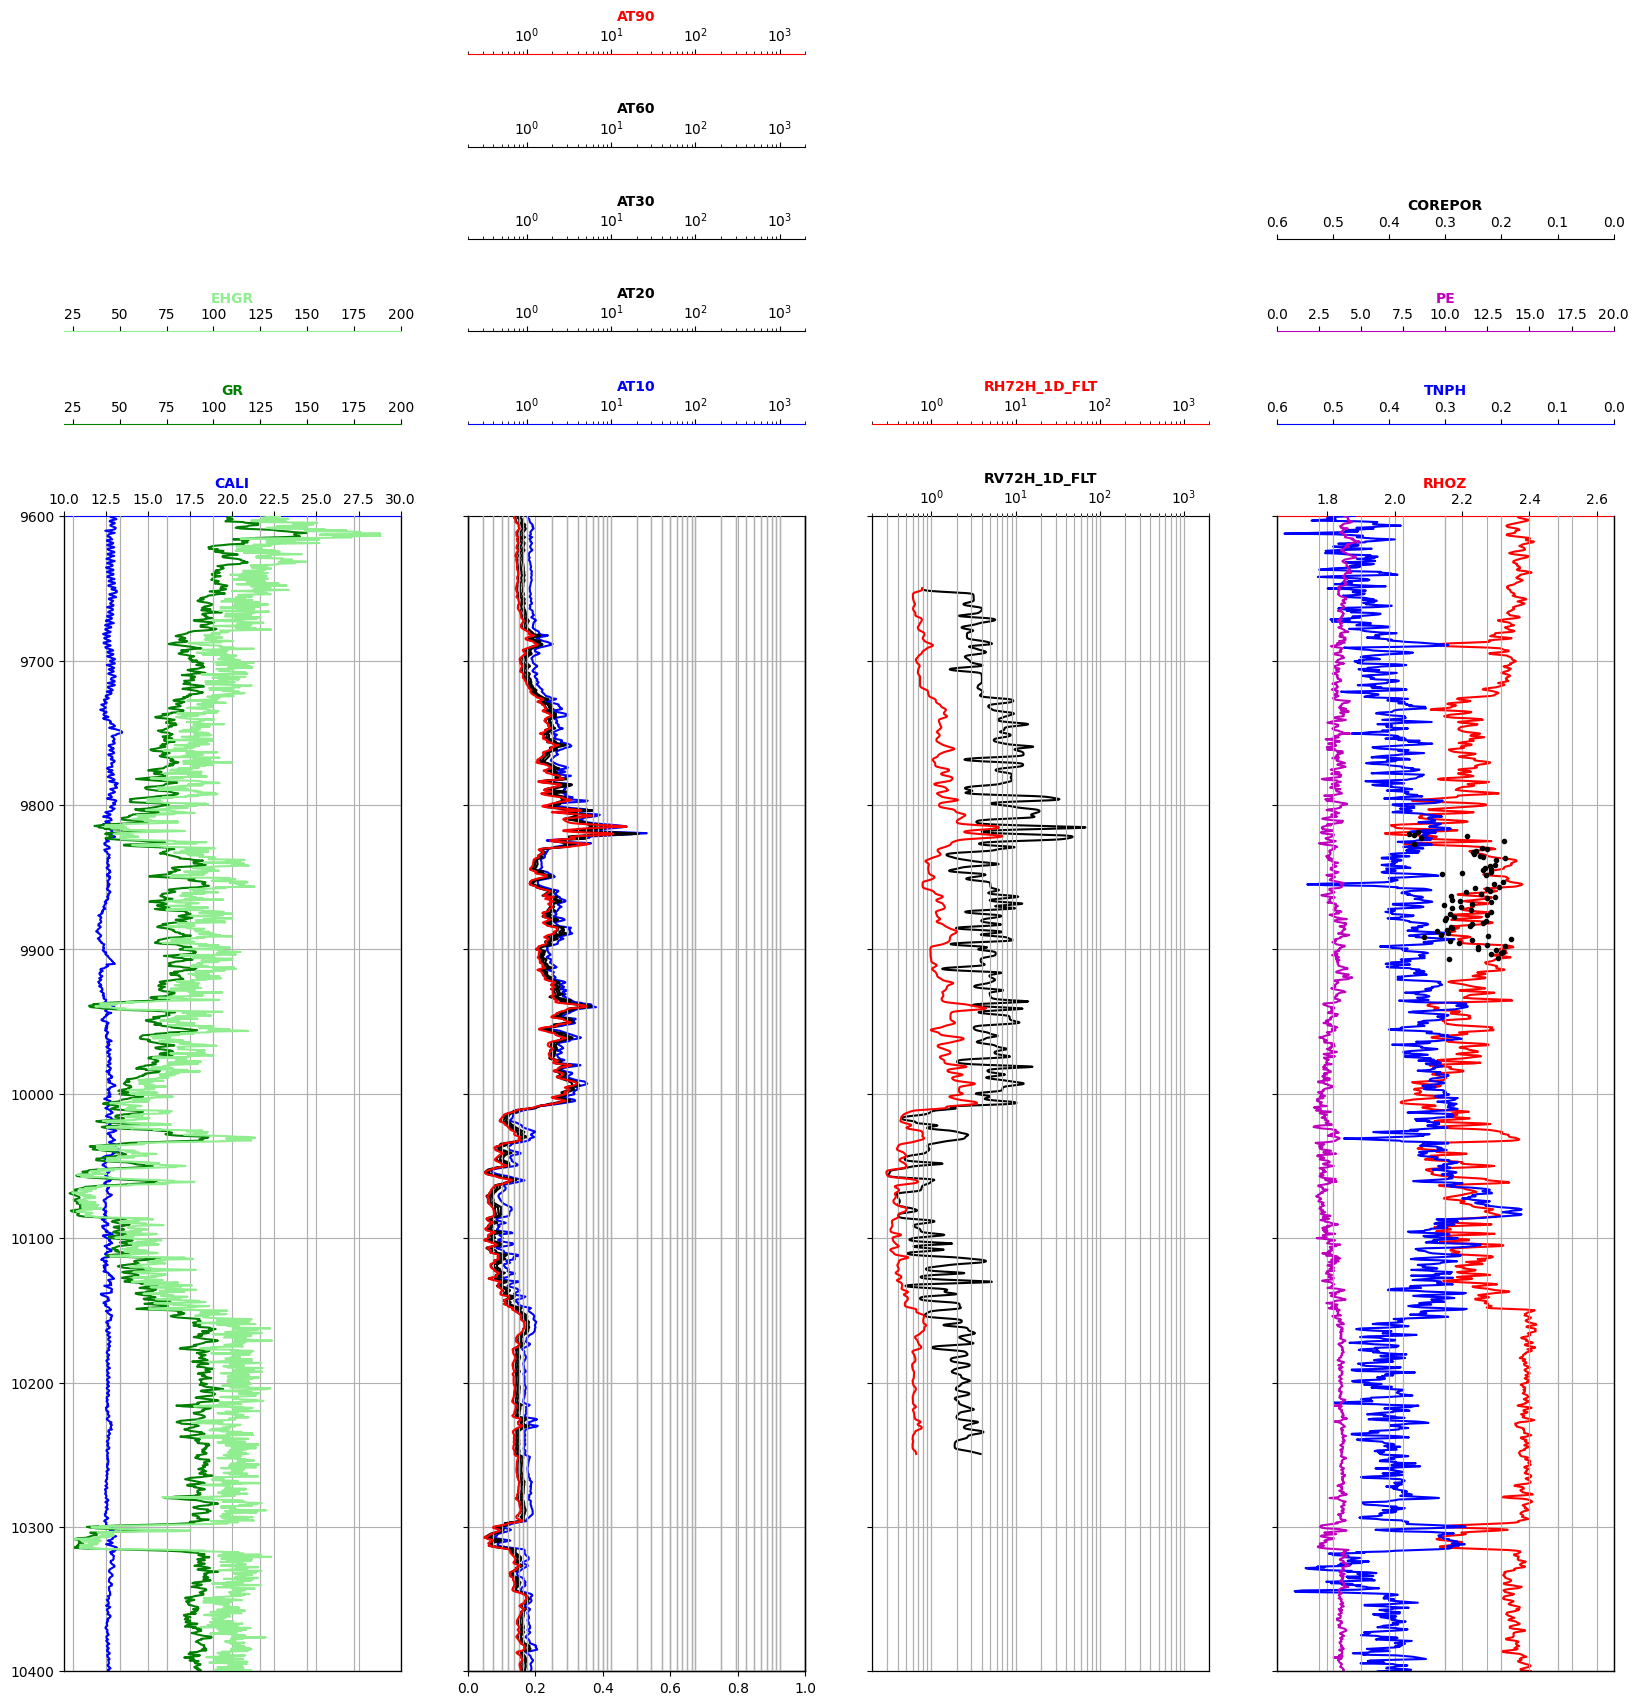

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(20,15), sharey=True)
ax1, ax2, ax3, ax4 = axs
pad = 1.08

ax11, ax12 = ax1.twiny(), ax1.twiny()
plot_curve(ax1, 'CALI', 10, 30,  color='b')
plot_curve(ax11, 'GR',  20,  200, color='g', pad=pad)
plot_curve(ax12, 'EHGR', 20, 200, color='lightgreen', pad=1.16)

resistivities = ['AT10','AT20','AT30','AT60','AT90']
res_colors    = ['b','k','k','k','r']
for idx, (res,c) in enumerate(zip(resistivities, res_colors)):
    plot_curve(ax2.twiny(), res, 0.2, 2000, color=c, semilog=True, pad=pad+(0.08*idx))
ax2.grid(True, which='both')

ax31 = ax3.twiny()
plot_curve(ax3,  'RV72H_1D_FLT', 0.2, 2000, color='k', semilog=True)
plot_curve(ax31, 'RH72H_1D_FLT', 0.2, 2000, color='r', semilog=True, pad=pad)

ax41, ax42, ax43 = ax4.twiny(), ax4.twiny(), ax4.twiny()
plot_curve(ax4, 'RHOZ',  1.65, 2.65, color='r')
plot_curve(ax41, 'TNPH', 0.60, 0.00, color='b', pad=pad)
plot_curve(ax42, 'PE',   0,    20,   color='m', pad=1.16)
plot_curve(ax43, 'COREPOR', 0.60, 0.00, marker='.', linestyle='', color='k', pad=1.24)

plt.gca().set_ylim(9600,10400)
plt.gca().invert_yaxis()
#plt.tight_layout()
plt.show()

In [6]:
depth_condition = np.logical_and(depth>9600, depth<=10200)

data = las[depth_condition]
data

AT10    AT20    AT30    AT60    AT90     CALI  CORE_FLAG  \
DEPTH:1                                                                
9600.25   1.0212  0.8368  0.7763  0.7189  0.7046  12.7679        NaN   
9600.50   1.0200  0.8325  0.7741  0.7171  0.7036  12.7843        NaN   
9600.75   1.0187  0.8336  0.7736  0.7180  0.7024  12.8697        NaN   
9601.00   1.0174  0.8347  0.7731  0.7190  0.7013  12.9551        NaN   
9601.25   1.0301  0.8432  0.7828  0.7246  0.7091  13.0169        NaN   
...          ...     ...     ...     ...     ...      ...        ...   
10199.00  0.9359  0.7963  0.7519  0.7070  0.6936  12.6207        NaN   
10199.25  0.9358  0.7963  0.7521  0.7076  0.6932  12.6461        NaN   
10199.50  0.9355  0.7964  0.7523  0.7082  0.6927  12.6716        NaN   
10199.75  0.9348  0.7962  0.7523  0.7083  0.6930  12.6752        NaN   
10200.00  0.9340  0.7961  0.7522  0.7085  0.6933  12.6788        NaN   

          COREPERM  COREPOR  CORERHOB  ...  POTA  RH72H_1D  RH72H_1D_FLT  \
DEPTH:1                                ...                                 
9600.25        NaN      NaN       NaN  ...  1.66       NaN           NaN   
9600.50        NaN      NaN       NaN  ...  1.59       NaN           NaN   
9600.75        NaN      NaN       NaN  ...  1.56       NaN           NaN   
9601.00        NaN      NaN       NaN  ...  1.53       NaN           NaN   
9601.25        NaN      NaN       NaN  ...  1.52       NaN           NaN   
...            ...      ...       ...  ...   ...       ...           ...   
10199.00       NaN      NaN       NaN  ...  2.15    0.5975        0.6000   
10199.25       NaN      NaN       NaN  ...  2.17    0.5975        0.6005   
10199.50       NaN      NaN       NaN  ...  2.19    0.5975        0.6016   
10199.75       NaN      NaN       NaN  ...  2.21    0.6030        0.6030   
10200.00       NaN      NaN       NaN  ...  2.23    0.6085        0.6045   

            RHO8    RHOZ  RV72H_1D  RV72H_1D_FLT     SDEV    TENS    TNPH  
DEPTH:1                                                                    
9600.25   2.3560  2.3650       NaN           NaN  52.3868  4227.0  0.4870  
9600.50   2.3593  2.3657       NaN           NaN  52.3869  4232.0  0.5002  
9600.75   2.3596  2.3674       NaN           NaN  52.3882  4253.5  0.5052  
9601.00   2.3598  2.3690       NaN           NaN  52.3895  4275.0  0.5102  
9601.25   2.3730  2.3741       NaN           NaN  52.3848  4269.5  0.5044  
...          ...     ...       ...           ...      ...     ...     ...  
10199.00  2.3992  2.3946    3.0257        2.8502  48.3448  4661.0  0.4660  
10199.25  2.4025  2.3938    3.0257        2.7847  48.3455  4626.5  0.4646  
10199.50  2.4058  2.3930    3.0257        2.6910  48.3463  4592.0  0.4633  
10199.75  2.4031  2.3942    2.6372        2.5861  48.3428  4615.0  0.4495  
10200.00  2.4003  2.3955    2.2487        2.4864  48.3394  4638.0  0.4356  

[2400 rows x 45 columns]

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture

pipe = Pipeline([('scaler', MinMaxScaler((0,1))), 
                 ('cluster', GaussianMixture(3, covariance_type='full', tol=1e-8, reg_covar=1e-10, max_iter=5000, n_init=50, warm_start=True, init_params='k-means++'))
                 ])
cluster = pipe.fit_predict(data[['AT90','RHO8','EHGR']])

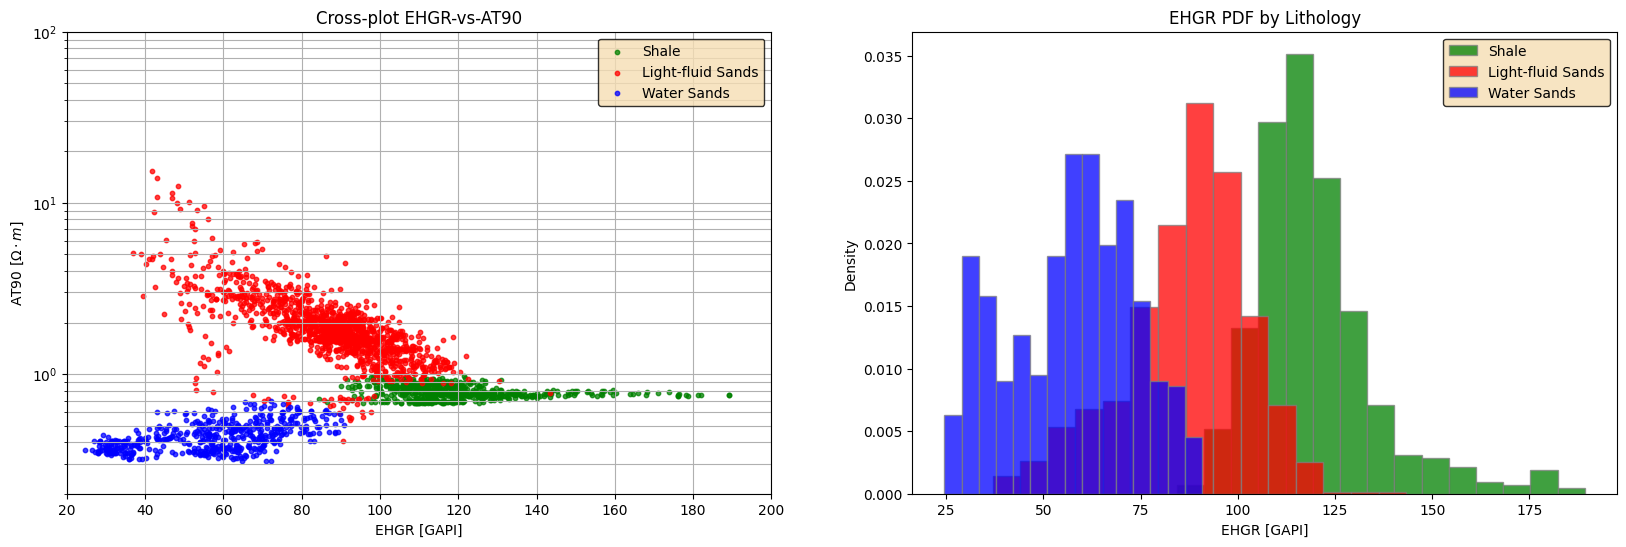

In [8]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.scatter(data['EHGR'][cluster==0], data['AT90'][cluster==0], c='g', s=10, alpha=0.75, label='Shale')
plt.scatter(data['EHGR'][cluster==1], data['AT90'][cluster==1], c='r', s=10, alpha=0.75, label='Light-fluid Sands')
plt.scatter(data['EHGR'][cluster==2], data['AT90'][cluster==2], c='b', s=10, alpha=0.75, label='Water Sands')
plt.xlabel('EHGR [GAPI]'); plt.ylabel('AT90 [$\Omega \cdot m$]')
plt.xlim(20, 200); plt.ylim(0.2, 100)
plt.grid(True, which='both'); plt.yscale('log')
plt.title('Cross-plot EHGR-vs-AT90')
plt.legend(facecolor='wheat', edgecolor='k')

plt.subplot(122)
plt.hist(data['EHGR'][cluster==0], bins=15, color='g', density=True, edgecolor='gray', alpha=0.75, label='Shale')
plt.hist(data['EHGR'][cluster==1], bins=15, color='r', density=True, edgecolor='gray', alpha=0.75, label='Light-fluid Sands')
plt.hist(data['EHGR'][cluster==2], bins=15, color='b', density=True, edgecolor='gray', alpha=0.75, label='Water Sands')
plt.legend(facecolor='wheat', edgecolor='k')
plt.xlabel('EHGR [GAPI]'); plt.ylabel('Density'); plt.title('EHGR PDF by Lithology')

plt.show()

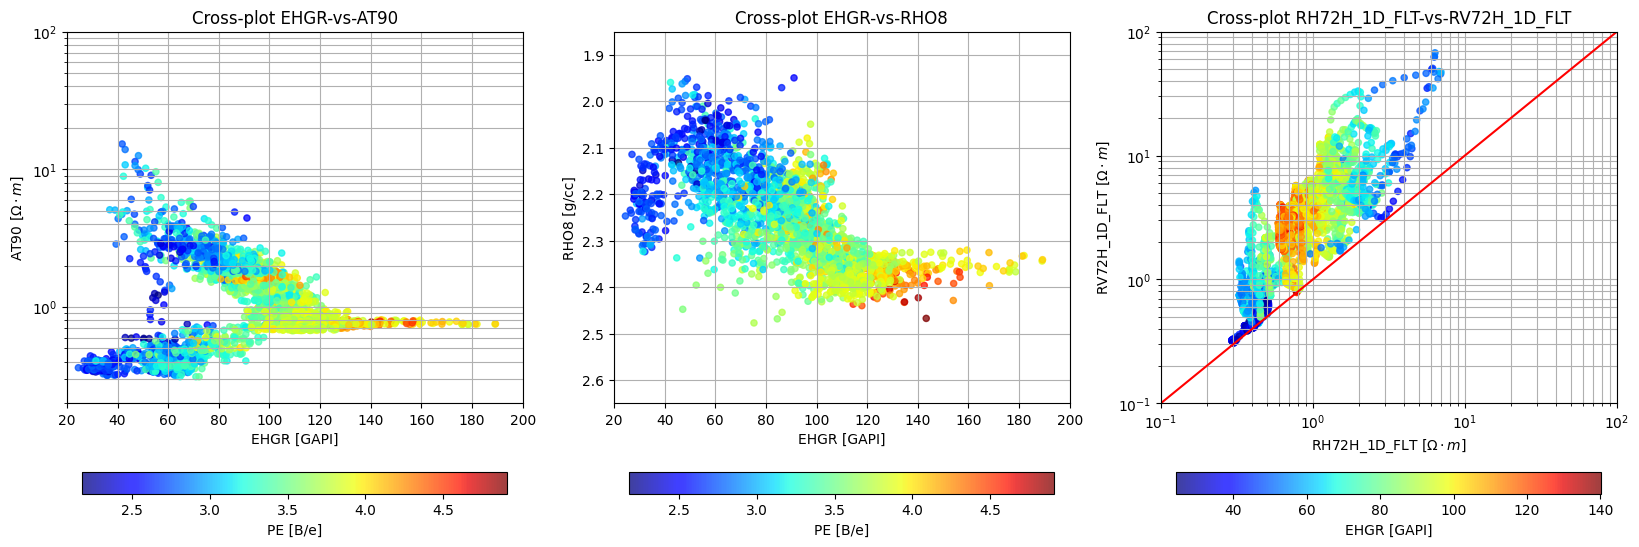

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.scatter(data['EHGR'], data['AT90'], c=data['PE'], cmap='jet', alpha=0.75, s=20)
plt.xlabel('EHGR [GAPI]'); plt.ylabel('AT90 [$\Omega \cdot m$]')
plt.xlim(20, 200); plt.ylim(0.2, 100)
plt.grid(True, which='both'); plt.yscale('log')
plt.title('Cross-plot EHGR-vs-AT90')
plt.colorbar(pad=0.15, fraction=0.046, label='PE [B/e]', orientation='horizontal')

plt.subplot(132)
plt.scatter(data['EHGR'], data['RHO8'], c=data['PE'], s=20, alpha=0.75, cmap='jet')
plt.xlim(20,200); plt.ylim(2.65,1.85); plt.colorbar(pad=0.15, fraction=0.046, label='PE [B/e]', orientation='horizontal')
plt.xlabel('EHGR [GAPI]'); plt.ylabel('RHO8 [g/cc]'); plt.grid('on')
plt.title('Cross-plot EHGR-vs-RHO8')

plt.subplot(133)
plt.grid(True, which='both')
plt.scatter(data['RH72H_1D_FLT'], data['RV72H_1D_FLT'], c=data['EHGR'], s=20, alpha=0.75, cmap='jet')
plt.xlim(0.1,100); plt.ylim(0.1,100)
cb = plt.colorbar(pad=0.15, fraction=0.046, label='EHGR [GAPI]', orientation='horizontal')
plt.yscale('log'); plt.xscale('log')
plt.axline([0,0],[100,100], c='r')
plt.xlabel('RH72H_1D_FLT [$\Omega\cdot m$]'); plt.ylabel('RV72H_1D_FLT [$\Omega\cdot m$]')
plt.title('Cross-plot RH72H_1D_FLT-vs-RV72H_1D_FLT')

plt.show()

In [10]:
raw.curvesdict

{'DEPTH:1': CurveItem(mnemonic="DEPTH:1", unit="FT", value="", descr="Depth", original_mnemonic="DEPTH", data.shape=(4001,)),
 'AT10': CurveItem(mnemonic="AT10", unit="OHMM", value="", descr="ShalRes     1       Array Induction Two Foot Resistivity A10", original_mnemonic="AT10", data.shape=(4001,)),
 'AT20': CurveItem(mnemonic="AT20", unit="OHMM", value="", descr="MedRes      2       Array Induction Two Foot Resistivity A20", original_mnemonic="AT20", data.shape=(4001,)),
 'AT30': CurveItem(mnemonic="AT30", unit="OHMM", value="", descr="MedRes      3       Array Induction Two Foot Resistivity A30", original_mnemonic="AT30", data.shape=(4001,)),
 'AT60': CurveItem(mnemonic="AT60", unit="OHMM", value="", descr="MedRes      4       Array Induction Two Foot Resistivity A60", original_mnemonic="AT60", data.shape=(4001,)),
 'AT90': CurveItem(mnemonic="AT90", unit="OHMM", value="", descr="DeepRes     5       Array Induction Two Foot Resistivity A90", original_mnemonic="AT90", data.shape=(400

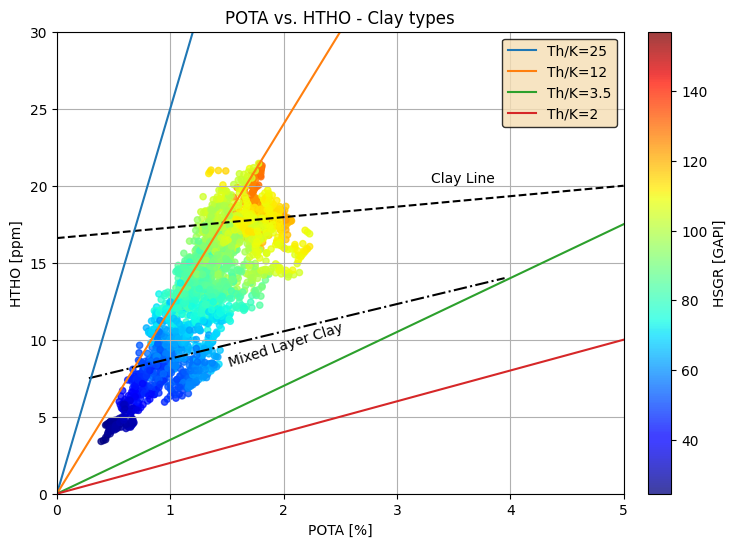

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(data['POTA'], data['HTHO'], c=data['HSGR'], cmap='jet', s=20, alpha=0.75)
plt.xlim(0,5); plt.ylim(0,30)
plt.grid('on')
plt.xlabel('POTA [%]'); plt.ylabel('HTHO [ppm]')
plt.colorbar(pad=0.04, fraction=0.046, label='HSGR [GAPI]')

plt.axline([0,16.6],[5,20], c='k', linestyle='--'); plt.text(3.3, 20.2, 'Clay Line')
plt.plot([0.282, 3.95], [7.5, 14], c='k', linestyle='-.'); plt.text(1.5, 8.24, 'Mixed Layer Clay', rotation=17.5)

x = np.linspace(0,5,50)

plt.plot(x, x*25, label='Th/K=25')
plt.plot(x, x*12, label='Th/K=12')
plt.plot(x, x*3.5, label='Th/K=3.5')
plt.plot(x, x*2, label='Th/K=2')
plt.legend(facecolor='wheat', edgecolor='k')

plt.title('POTA vs. HTHO - Clay types')

plt.show()

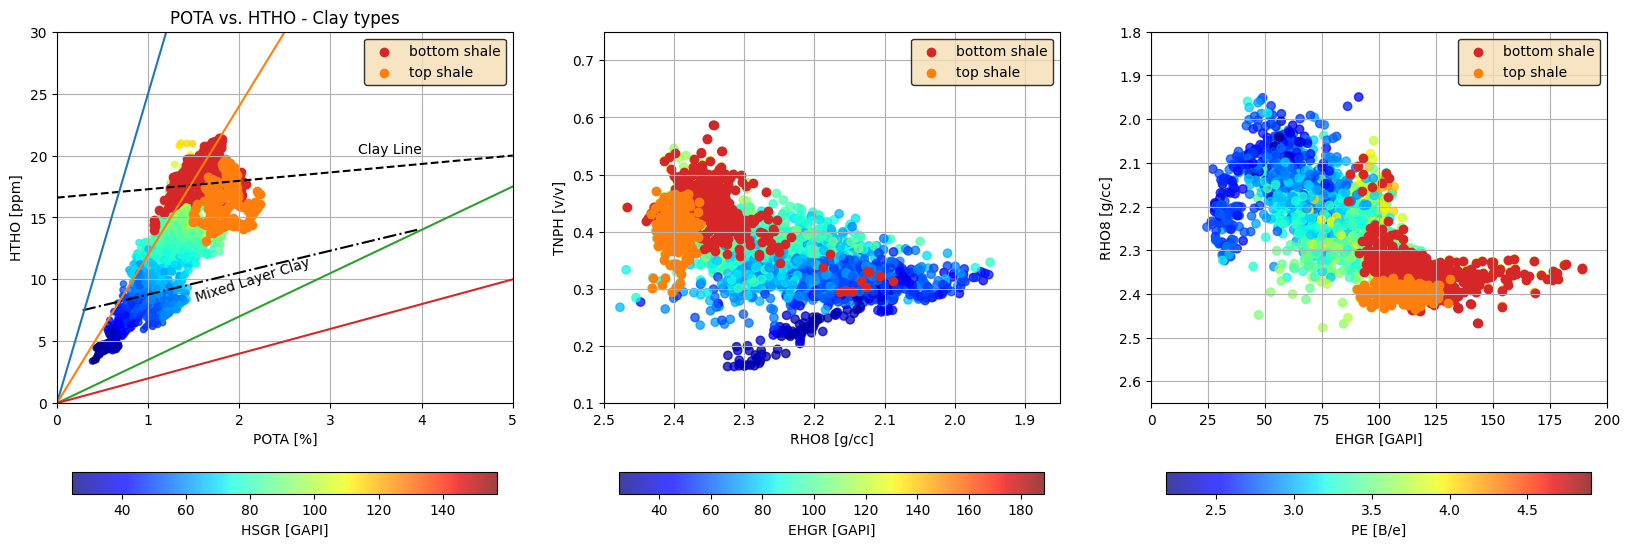

In [12]:
plt.figure(figsize=(20,6))

plt.subplot(131)
im = plt.scatter(data['POTA'], data['HTHO'], c=data['HSGR'], cmap='jet', s=20, alpha=0.75)
plt.scatter(data['POTA'][:9720], data['HTHO'][:9720], c='tab:red', label='bottom shale')
plt.scatter(data['POTA'][10150:], data['HTHO'][10150:], c='tab:orange', label='top shale')
plt.xlim(0,5); plt.ylim(0,30); plt.xlabel('POTA [%]'); plt.ylabel('HTHO [ppm]')
plt.grid('on'); plt.legend(facecolor='wheat', edgecolor='k')
plt.colorbar(im, pad=0.15, fraction=0.046, label='HSGR [GAPI]', orientation='horizontal')
plt.axline([0,16.6],[5,20], c='k', linestyle='--'); plt.text(3.3, 20.2, 'Clay Line')
plt.plot([0.282, 3.95], [7.5, 14], c='k', linestyle='-.'); plt.text(1.5, 8.24, 'Mixed Layer Clay', rotation=17.5)
x = np.linspace(0,5,50); plt.plot(x, x*25, label='Th/K=25'); plt.plot(x, x*12, label='Th/K=12'); plt.plot(x, x*3.5, label='Th/K=3.5'); plt.plot(x, x*2, label='Th/K=2')
#plt.legend(facecolor='wheat', edgecolor='k', loc='lower right')

plt.title('POTA vs. HTHO - Clay types')

plt.subplot(132)
im = plt.scatter(data['RHO8'], data['TNPH'], c=data['EHGR'], cmap='jet', alpha=0.75)
plt.scatter(data['RHO8'][:9720], data['TNPH'][:9720], c='tab:red', label='bottom shale')
plt.scatter(data['RHO8'][10150:], data['TNPH'][10150:], c='tab:orange', label='top shale')
plt.grid('on'); plt.legend(facecolor='wheat', edgecolor='k')
plt.xlim(2.5, 1.85); plt.ylim(0.1,0.75)
plt.xlabel('RHO8 [g/cc]'); plt.ylabel('TNPH [v/v]')
plt.colorbar(im, pad=0.15, fraction=0.046, label='EHGR [GAPI]', orientation='horizontal')

plt.subplot(133)
im = plt.scatter(data['EHGR'], data['RHO8'], c=data['PE'], cmap='jet', alpha=0.75)
plt.scatter(data['EHGR'][:9720], data['RHO8'][:9720], c='tab:red', label='bottom shale')
plt.scatter(data['EHGR'][10150:], data['RHO8'][10150:], c='tab:orange', label='top shale')
plt.grid('on'); plt.legend(facecolor='wheat', edgecolor='k')
plt.xlim(0, 200); plt.ylim(2.65, 1.8)
plt.xlabel('EHGR [GAPI]'); plt.ylabel('RHO8 [g/cc]')
plt.colorbar(im, pad=0.15, fraction=0.046, label='PE [B/e]', orientation='horizontal')

plt.show()

In [13]:
csh = pd.DataFrame({'Csh':(data['EHGR']-24.5519)/(140.2567-24.5519)})
csh

Csh
DEPTH:1           
9600.25   0.903076
9600.50   0.897852
9600.75   0.917477
9601.00   0.894793
9601.25   0.878335
...            ...
10199.00  0.815543
10199.25  0.775378
10199.50  0.716713
10199.75  0.724736
10200.00  0.743376

[2400 rows x 1 columns]

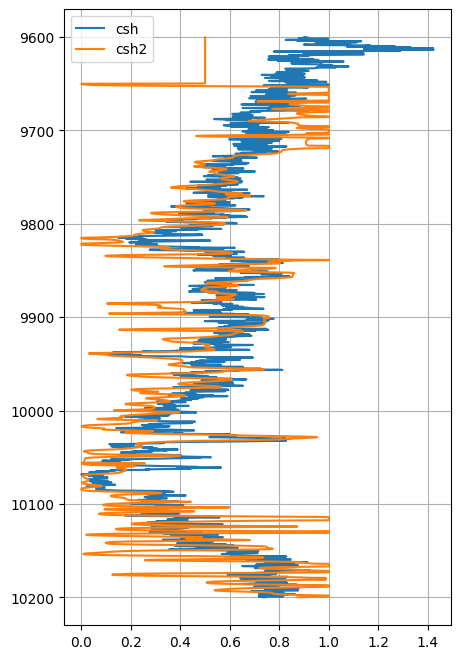

In [14]:
Rvsh = 2.8133
Rhsh = 0.7746
lambda_reg = 1e-4

def objective(variables, *args):
    Csh, Rs = variables
    Rv,  Rh = args[0], args[1]

    eq1 = Rv - Csh*Rvsh - (1-Csh)*Rs
    eq2 = (1/Rh) - Csh/Rhsh - (1-Csh)/Rs

    return eq1**2 + eq2**2 +  lambda_reg*(Csh**2 + Rs**2)

res_aniso = data[['RH72H_1D_FLT','RV72H_1D_FLT']]
solutions = []
sol, jac, nfev, k = [], [], [], 0
for index, row in res_aniso.iterrows():
    Rv_value, Rh_value = row['RV72H_1D_FLT'], row['RH72H_1D_FLT']
    solution = optim.minimize(objective,
                              x0      = [0.5, 1.5], 
                              args    = (Rv_value, Rh_value),
                              bounds  = [(0,1),(None,None)],
                              method  = 'L-BFGS-B',
                              tol     = 1e-6,
                              options = {'maxiter':1e5}) 
    sol.append(solution.fun); jac.append(solution.jac); nfev.append(solution.nfev)
    solutions.append({'Csh':solution.x[0], 'Rs':solution.x[1]})
    k += 1

csh2 = pd.DataFrame(solutions)['Csh']

plt.figure(figsize=(5,8))
plt.plot(csh, depth[depth_condition], label='csh')
plt.plot(csh2, depth[depth_condition], label='csh2')
plt.legend(); plt.grid('on')
plt.gca().invert_yaxis()
plt.show()

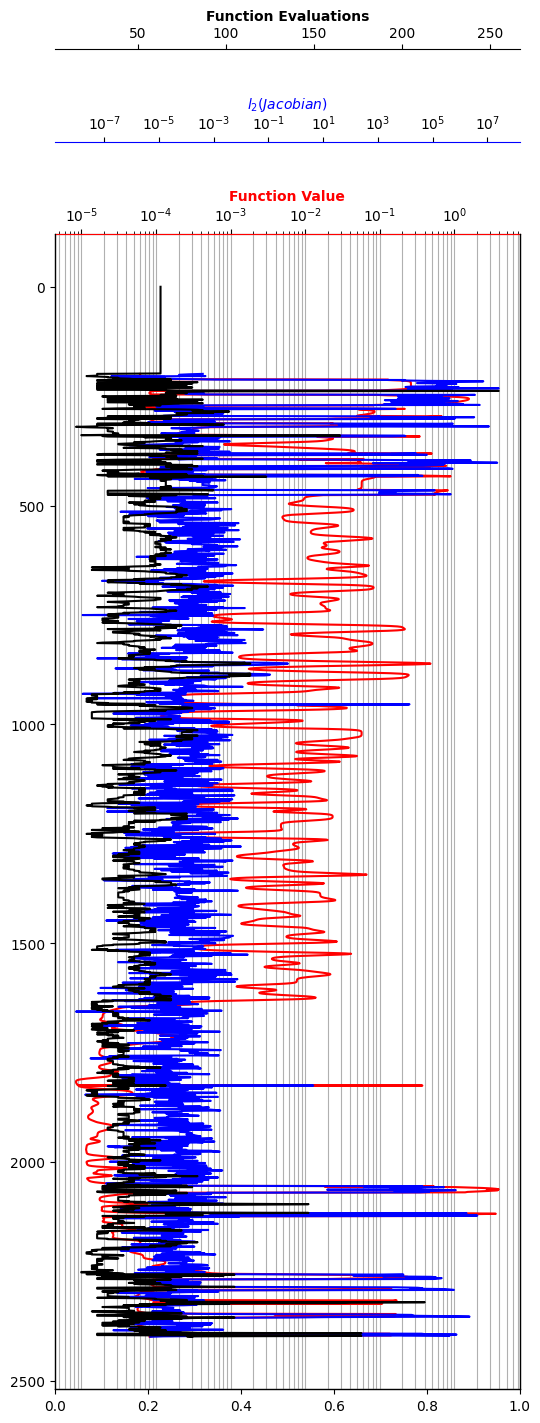

In [15]:
fig, ax = plt.subplots(1,1, figsize=(6,15))

ax1, ax2, ax3 = ax.twiny(), ax.twiny(), ax.twiny()
ax1.grid(True, which='both')
ax1.semilogx(sol, np.arange(k), 'r')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.spines['top'].set_position(('axes', 1))
ax1.spines['top'].set_edgecolor('red')
ax1.set_xlabel('Function Value', color='r', weight='bold')

ax2.semilogx(np.linalg.norm(jac, axis=1), np.arange(k), 'b')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.spines['top'].set_position(('axes', 1.08))
ax2.spines['top'].set_edgecolor('b')
ax2.set_xlabel('$l_2 (Jacobian)$', color='b', weight='bold')

ax3.plot(nfev, np.arange(k), 'k')
ax3.xaxis.set_ticks_position('top')
ax3.xaxis.set_label_position('top')
ax3.spines['top'].set_position(('axes', 1.16))
ax3.spines['top'].set_edgecolor('k')
ax3.set_xlabel('Function Evaluations', color='k', weight='bold')

ax.invert_yaxis()

plt.show()

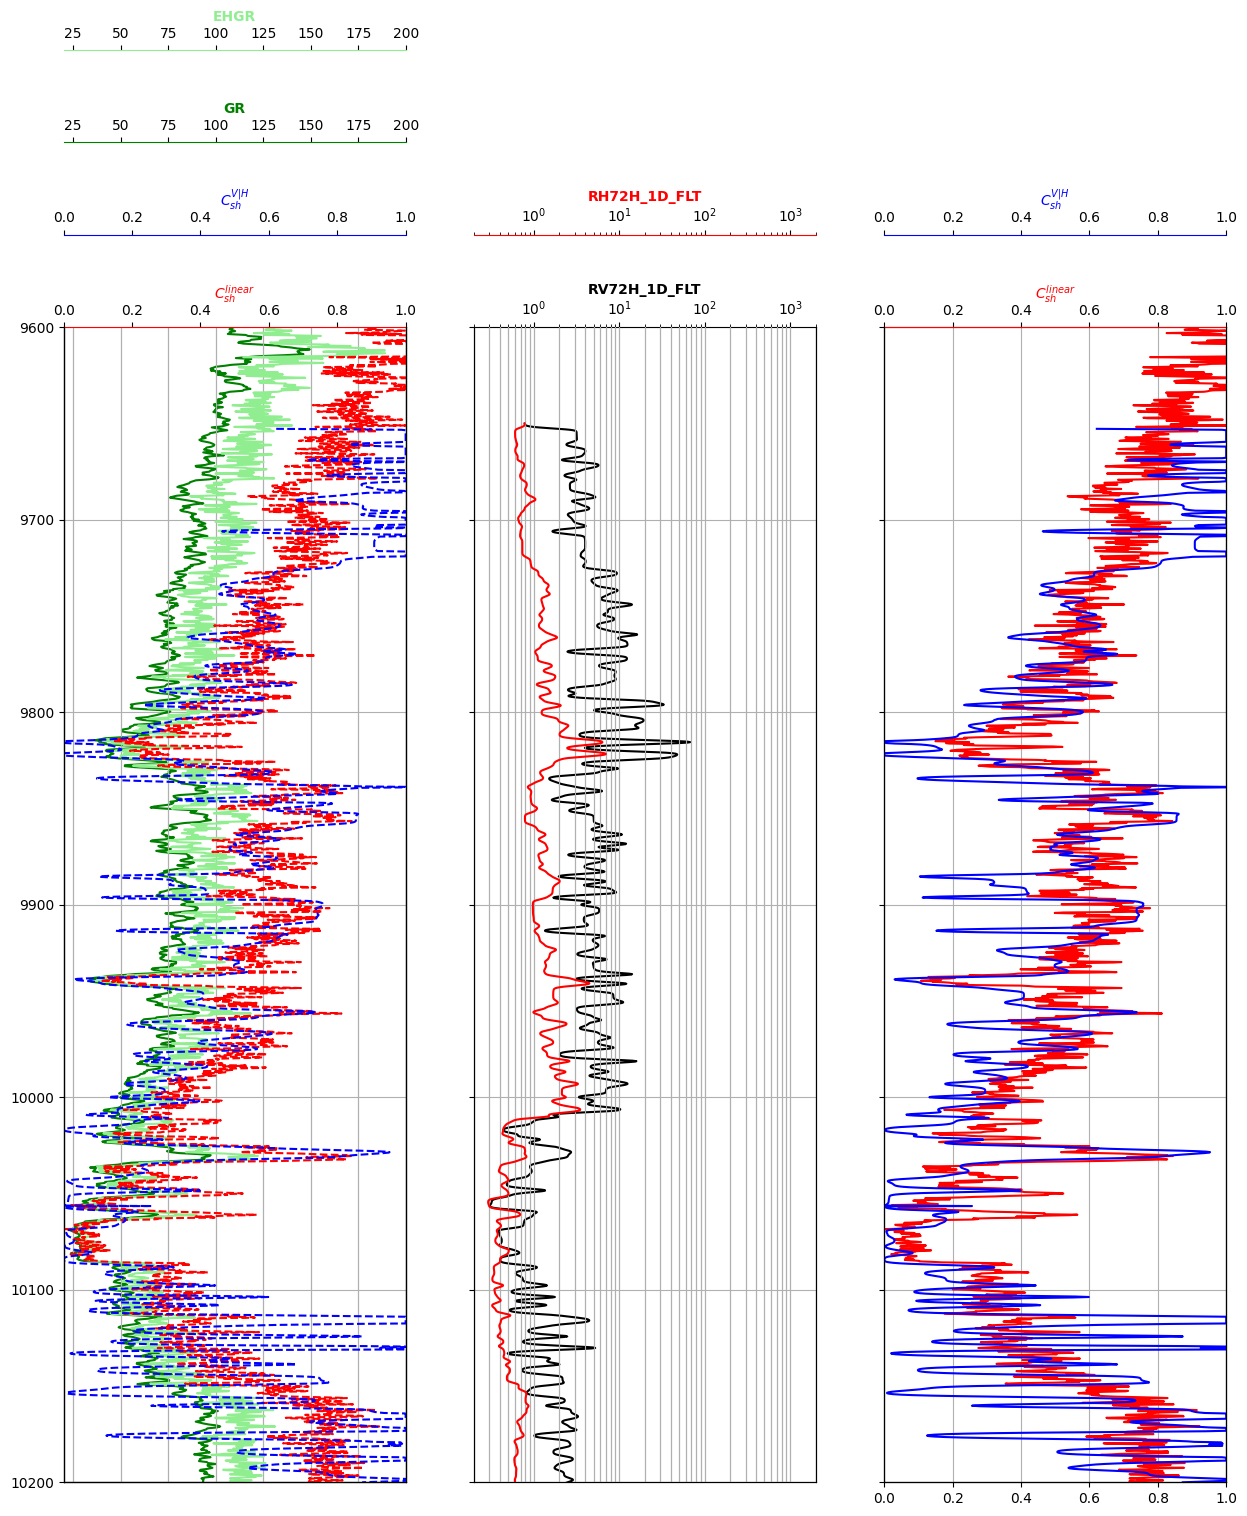

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15,15), sharey=True)
ax1, ax2, ax3 = axs

ax11, ax12, ax13 = ax1.twiny(), ax1.twiny(), ax1.twiny()
plot_curve(ax1, 'GR',  20,  200, color='g', pad=1.16)
plot_curve(ax11, 'EHGR', 20, 200, color='lightgreen', pad=1.24)

ax12.plot(csh, depth[depth_condition], 'r--')
ax12.set_xlim(0,1)
ax12.xaxis.set_ticks_position('top')
ax12.xaxis.set_label_position('top')
ax12.spines['top'].set_position(('axes', 1))
ax12.spines['top'].set_edgecolor('red')
ax12.set_xlabel('$C_{sh}^{linear}$', color='r', weight='bold')

ax13.plot(csh2.iloc[210:], depth[depth_condition][210:], 'b--')
ax13.set_xlim(0,1)
ax13.xaxis.set_ticks_position('top')
ax13.xaxis.set_label_position('top')
ax13.spines['top'].set_position(('axes', 1.08))
ax13.spines['top'].set_edgecolor('b')
ax13.set_xlabel('$C_{sh}^{V | H}$', color='b', weight='bold')

ax21 = ax2.twiny()
plot_curve(ax2,  'RV72H_1D_FLT', 0.2, 2000, color='k', semilog=True)
plot_curve(ax21, 'RH72H_1D_FLT', 0.2, 2000, color='r', semilog=True, pad=pad)

ax31, ax32 = ax3.twiny(), ax3.twiny()
ax3.grid(True, which='both')
ax31.plot(csh, depth[depth_condition], 'r')
ax31.set_xlim(0,1)
ax31.xaxis.set_ticks_position('top')
ax31.xaxis.set_label_position('top')
ax31.spines['top'].set_position(('axes', 1))
ax31.spines['top'].set_edgecolor('red')
ax31.set_xlabel('$C_{sh}^{linear}$', color='r', weight='bold')

ax32.plot(csh2.iloc[210:], depth[depth_condition][210:], 'b')
ax32.set_xlim(0,1)
ax32.xaxis.set_ticks_position('top')
ax32.xaxis.set_label_position('top')
ax32.spines['top'].set_position(('axes', 1.08))
ax32.spines['top'].set_edgecolor('b')
ax32.set_xlabel('$C_{sh}^{V | H}$', color='b', weight='bold')

plt.gca().set_ylim(9600,10200)
plt.gca().invert_yaxis()
#plt.tight_layout()
plt.show()

In [17]:
rhob = (2.71 - data['RHO8']) / (2.71 - 1)

In [18]:
phi_n = (data['TNPH'].values - csh['Csh']*0.4640) / (1-csh['Csh'])
phi_d = (data['PHID_SS'].values - csh['Csh']*0.1861) / (1-csh['Csh'])
phi_d = (rhob.values - csh['Csh']*0.1861) / (1-csh['Csh'])
phi_s = 0.5 * np.sqrt(phi_n**2 + phi_d**2)
phi_t = phi_s*(1-csh['Csh']) + 0.1861*csh['Csh']

(2400,) (2400,)


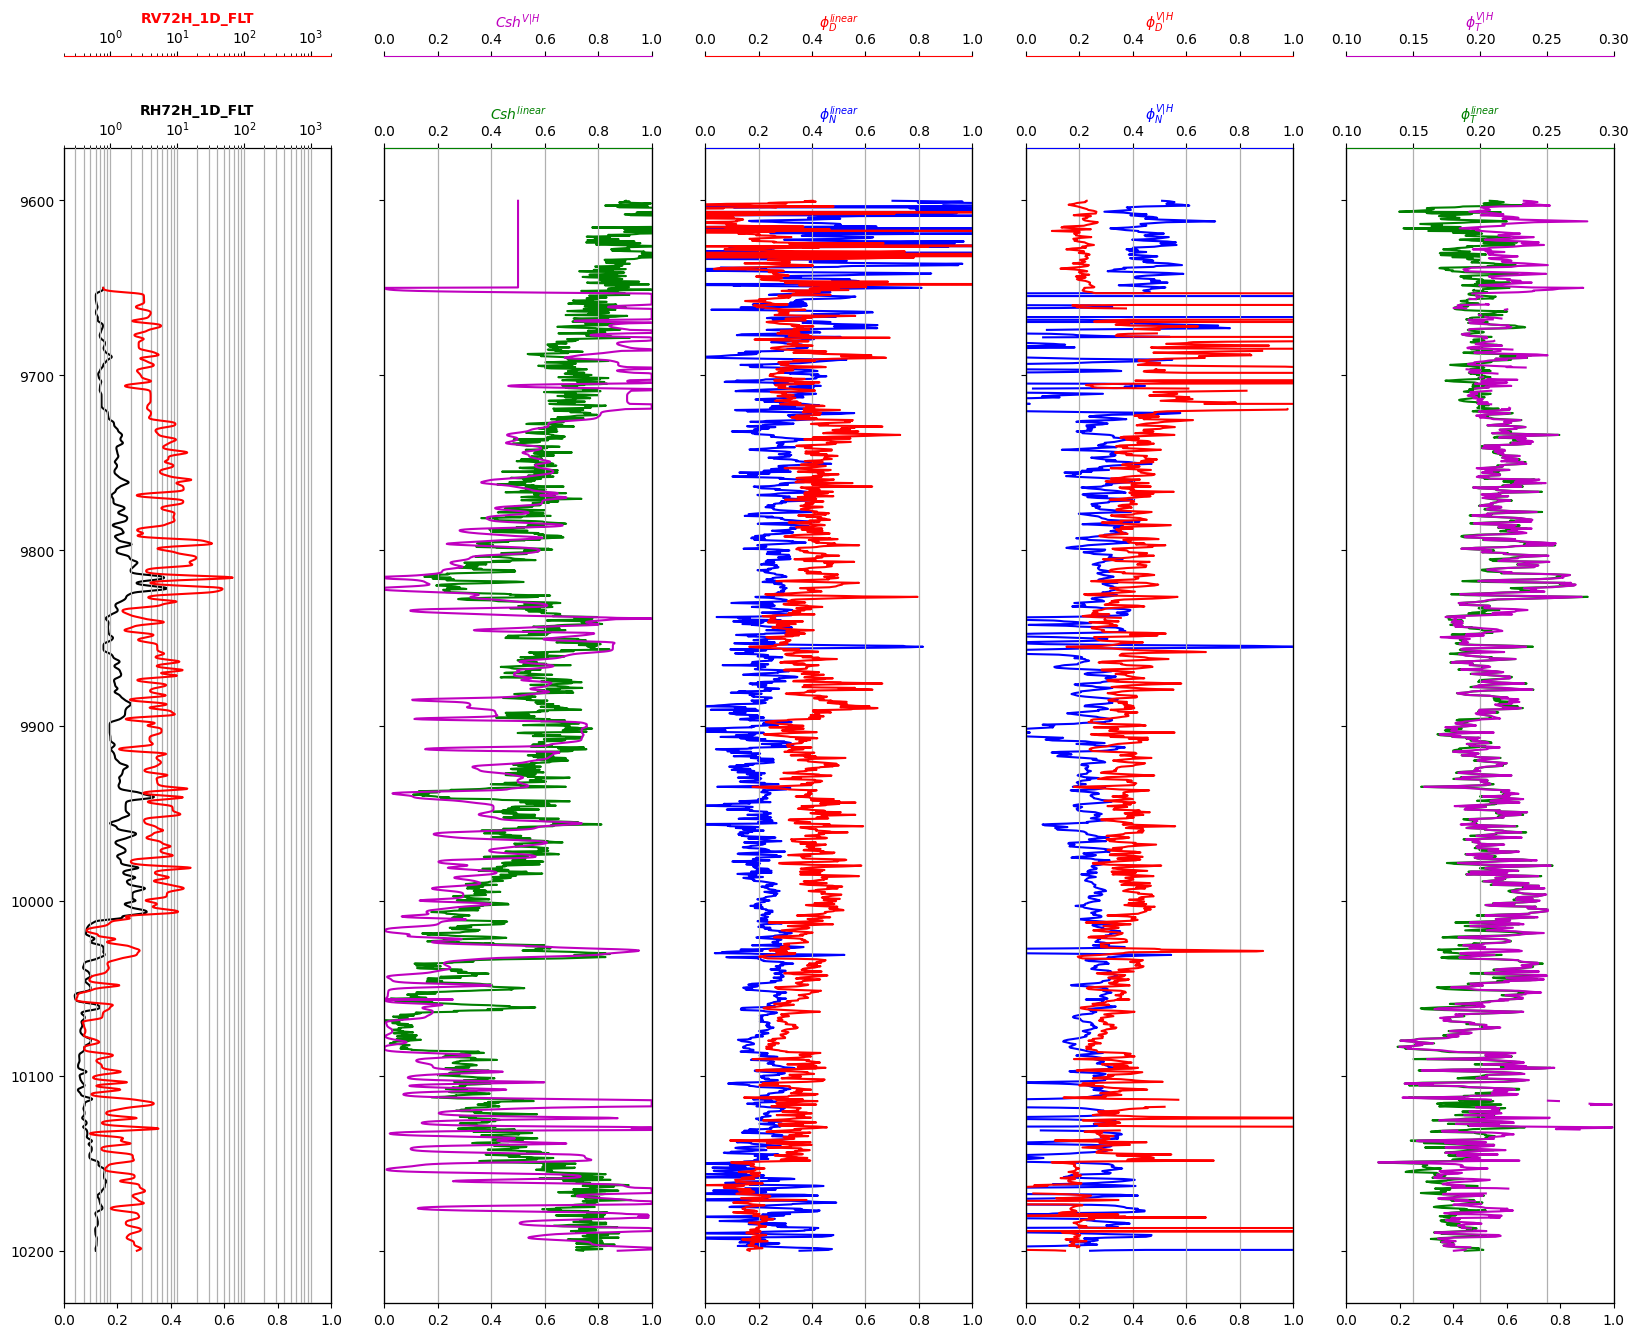

In [19]:
phi_n = (data['TNPH'].values - csh['Csh']*0.4640) / (1-csh['Csh'])
phi_d = (data['PHID_SS'].values - csh['Csh']*0.1861) / (1-csh['Csh'])
phi_d = (rhob.values - csh['Csh']*0.1861) / (1-csh['Csh'])
phi_s = 0.5 * np.sqrt(phi_n**2 + phi_d**2)
phi_t = phi_s*(1-csh['Csh']) + 0.1861*csh['Csh']

phi_n2 = (data['TNPH'].values - csh2*0.4640) / (1-csh2)
phi_d2 = (data['PHID_SS'].values - csh2*0.1861) / (1-csh2)
phi_d2 = (rhob.values - csh2*0.1861) / (1-csh2)
phi_s2 = 0.5 * np.sqrt(phi_n2**2 + phi_d2**2)
phi_t2 = phi_s2*(1-csh2) + 0.1861*csh2

print(phi_n.shape, phi_d.shape)

fig, axs = plt.subplots(1, 5, figsize=(20,15), sharey=True)
ax1, ax2, ax3, ax4, ax5, = axs

ax1.invert_yaxis()

ax11, ax12 = ax1.twiny(), ax1.twiny()
ax11.semilogx(data['RH72H_1D_FLT'], depth[depth_condition], label='RH', c='k')
ax11.grid(True, which='both')
ax11.set_xlim(0.2,2000)
ax11.xaxis.set_ticks_position('top')
ax11.xaxis.set_label_position('top')
ax11.spines['top'].set_position(('axes',1))
ax11.spines['top'].set_edgecolor('k')
ax11.set_xlabel('RH72H_1D_FLT', color='k', weight='bold')

ax12.semilogx(data['RV72H_1D_FLT'], depth[depth_condition], label='RV', c='r')
ax12.grid(True, which='both')
ax12.set_xlim(0.2,2000)
ax12.xaxis.set_ticks_position('top')
ax12.xaxis.set_label_position('top')
ax12.spines['top'].set_position(('axes',1.08))
ax12.spines['top'].set_edgecolor('r')
ax12.set_xlabel('RV72H_1D_FLT', color='r', weight='bold')

ax21, ax22 = ax2.twiny(), ax2.twiny()
ax21.plot(csh['Csh'], depth[depth_condition], label='Csh', c='g')
ax21.grid(True, which='both')
ax21.set_xlim(0,1)
ax21.xaxis.set_ticks_position('top')
ax21.xaxis.set_label_position('top')
ax21.spines['top'].set_position(('axes',1))
ax21.spines['top'].set_edgecolor('g')
ax21.set_xlabel('$Csh^{linear}$', color='g', weight='bold')

ax22.plot(csh2.values, depth[depth_condition], label='Csh2', c='m')
ax22.grid(True, which='both')
ax22.set_xlim(0,1)
ax22.xaxis.set_ticks_position('top')
ax22.xaxis.set_label_position('top')
ax22.spines['top'].set_position(('axes',1.08))
ax22.spines['top'].set_edgecolor('m')
ax22.set_xlabel('$Csh^{V | H}$', color='m', weight='bold')

ax31, ax32 = ax3.twiny(), ax3.twiny()
ax3.invert_yaxis()
ax31.plot(phi_n, depth[depth_condition], label='Neutron', c='b')
ax31.grid(True, which='both')
ax31.set_xlim(0,1)
ax31.xaxis.set_ticks_position('top')
ax31.xaxis.set_label_position('top')
ax31.spines['top'].set_position(('axes',1))
ax31.spines['top'].set_edgecolor('b')
ax31.set_xlabel('$\phi_N^{linear}$', color='b', weight='bold')

ax32.plot(phi_d, depth[depth_condition], label='Density', c='r')
ax32.grid(True, which='both')
ax32.set_xlim(0,1)
ax32.xaxis.set_ticks_position('top')
ax32.xaxis.set_label_position('top')
ax32.spines['top'].set_position(('axes',1.08))
ax32.spines['top'].set_edgecolor('r')
ax32.set_xlabel('$\phi_D^{linear}$', color='r', weight='bold')

ax41, ax42 = ax4.twiny(), ax4.twiny()
ax4.invert_yaxis()
ax41.plot(phi_n2, depth[depth_condition], label='Neutron', c='b')
ax41.grid(True, which='both')
ax41.set_xlim(0,1)
ax41.xaxis.set_ticks_position('top')
ax41.xaxis.set_label_position('top')
ax41.spines['top'].set_position(('axes',1))
ax41.spines['top'].set_edgecolor('b')
ax41.set_xlabel('$\phi_N^{V|H}$', color='b', weight='bold')

ax42.plot(phi_d2, depth[depth_condition], label='Density', c='r')
ax42.grid(True, which='both')
ax42.set_xlim(0,1)
ax42.xaxis.set_ticks_position('top')
ax42.xaxis.set_label_position('top')
ax42.spines['top'].set_position(('axes',1.08))
ax42.spines['top'].set_edgecolor('r')
ax42.set_xlabel('$\phi_D^{V|H}$', color='r', weight='bold')

ax51, ax52 = ax5.twiny(), ax5.twiny()
ax51.plot(phi_t, depth[depth_condition], label='$\phi_T$', c='g')
ax51.grid(True, which='both')
ax51.set_xlim(0.1,0.3)
ax51.xaxis.set_ticks_position('top')
ax51.xaxis.set_label_position('top')
ax51.spines['top'].set_position(('axes',1))
ax51.spines['top'].set_edgecolor('g')
ax51.set_xlabel('$\phi_T^{linear}$', color='g', weight='bold')

ax52.plot(phi_t2, depth[depth_condition], label='$\phi_T$', c='m')
ax52.grid(True, which='both')
ax52.set_xlim(0.1,0.3)
ax52.xaxis.set_ticks_position('top')
ax52.xaxis.set_label_position('top')
ax52.spines['top'].set_position(('axes',1.08))
ax52.spines['top'].set_edgecolor('m')
ax52.set_xlabel('$\phi_T^{V | H}$', color='m', weight='bold')

plt.show()

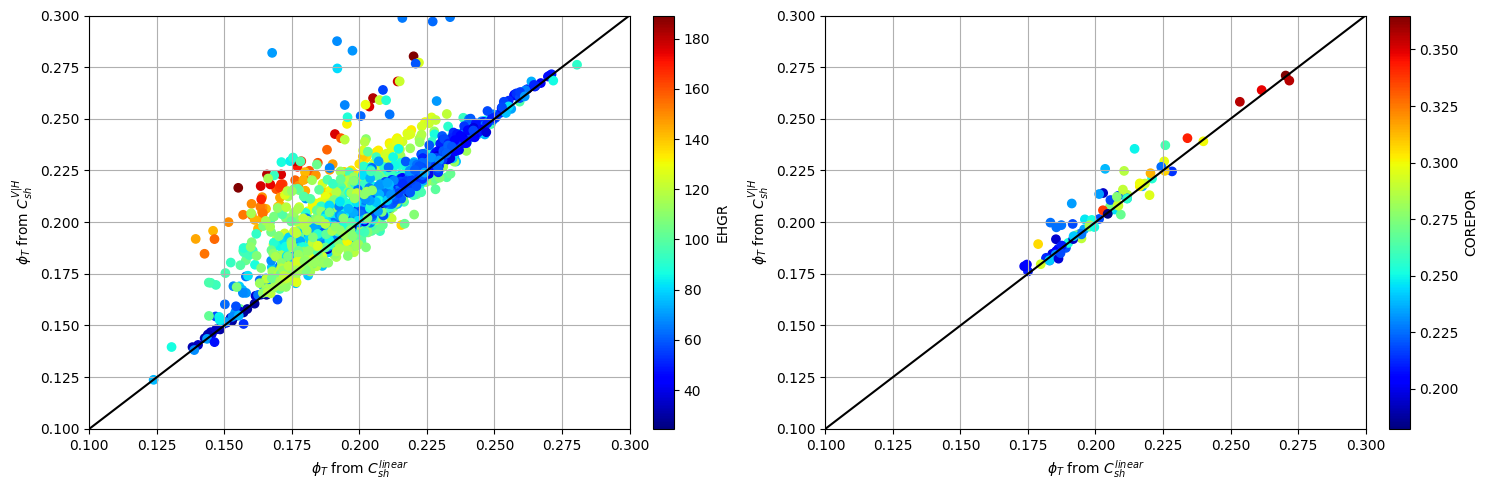

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.scatter(phi_t, phi_t2, c=data['EHGR'], cmap='jet')
plt.xlim(0.1,0.3); plt.ylim(0.1,0.3)
plt.grid('on'); plt.colorbar(pad=0.04, fraction=0.046, label='EHGR')
plt.axline([0,0],[1,1], c='k')
plt.xlabel('$\phi_T$ from $C_{sh}^{linear}$')
plt.ylabel('$\phi_T$ from $C_{sh}^{V|H}$')

plt.subplot(122)
plt.scatter(phi_t, phi_t2, c=data['COREPOR'], cmap='jet')
plt.xlim(0.1,0.3); plt.ylim(0.1,0.3)
plt.grid('on'); plt.colorbar(pad=0.04, fraction=0.046, label='COREPOR')
plt.axline([0,0],[1,1], c='k')
plt.xlabel('$\phi_T$ from $C_{sh}^{linear}$')
plt.ylabel('$\phi_T$ from $C_{sh}^{V|H}$')

plt.tight_layout()
plt.show()

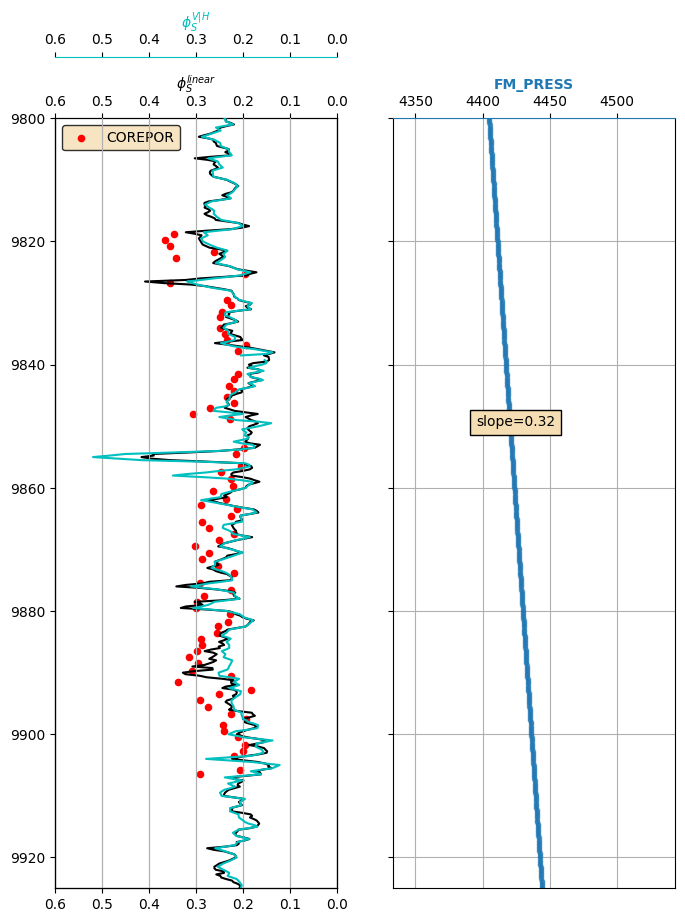

In [21]:
fig, axs = plt.subplots(1,2, figsize=(8,10), sharey=True)

ax1, ax2 = axs

ax1.scatter(data['COREPOR'].values, depth[depth_condition], s=20, c='r', label='COREPOR')
ax1.set_xlim(0.6,0)
ax1.legend(facecolor='wheat', edgecolor='k', loc='upper left')

ax11, ax12 = ax1.twiny(), ax1.twiny()
ax11.plot(phi_s, depth[depth_condition], label='$\phi_S$', c='k')
ax11.grid(True, which='both')
ax11.set_xlim(0.6,0)
ax11.xaxis.set_ticks_position('top')
ax11.xaxis.set_label_position('top')
ax11.spines['top'].set_position(('axes',1))
ax11.spines['top'].set_edgecolor('k')
ax11.set_xlabel('$\phi_S^{linear}$', color='k', weight='bold')

ax12.plot(phi_s2, depth[depth_condition], label='$\phi_S$', c='c')
ax12.grid(True, which='both')
ax12.set_xlim(0.6,0)
ax12.xaxis.set_ticks_position('top')
ax12.xaxis.set_label_position('top')
ax12.spines['top'].set_position(('axes',1.08))
ax12.spines['top'].set_edgecolor('c')
ax12.set_xlabel('$\phi_S^{V | H}$', color='c', weight='bold')

ax2.plot(data['FPRESS'], depth[depth_condition], c='tab:blue', marker='.', linestyle=None, alpha=0.5)
ax2.grid(True, which='both')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.spines['top'].set_position(('axes',1))
ax2.spines['top'].set_edgecolor('tab:blue')
ax2.set_xlabel('FM_PRESS', color='tab:blue', weight='bold')
slope = (data['FPRESS'].iloc[-1] - data['FPRESS'].iloc[0]) / (data['FPRESS'].index[-1] - data['FPRESS'].index[0])
ax2.text(4395, 9850, 'slope={:.2f}'.format(slope), bbox={'facecolor':'wheat'})

ax2.set_ylim(9800,9925)
ax2.invert_yaxis()

plt.show()

[False  True] [False  True]


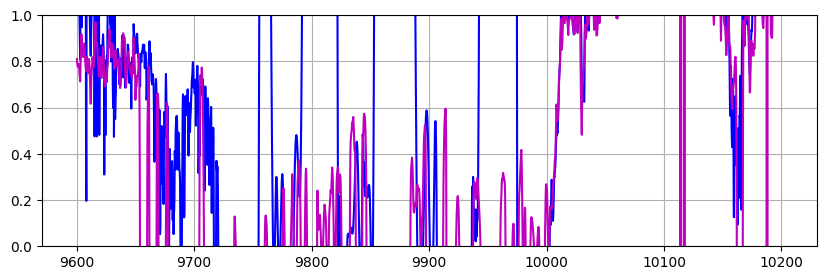

In [22]:
rsh = data['AT90'][9651]

rs  = (1-csh['Csh']) / ( (1/data['AT90'].values) - (csh['Csh']/rsh))
sw = (0.021 / (rs * phi_t**2.1))**(1/1.9)

rs2  = (1-csh2.values) / ( (1/data['AT90'].values) - (csh2.values/rsh))
sw2 = (0.021 / (rs2 * phi_t2**2.1))**(1/1.9)

print(np.unique(sw.isna()), np.unique(sw2.isna()))

plt.figure(figsize=(10,3))
plt.plot(depth[depth_condition], sw.interpolate('polynomial', order=5), 'b')
plt.plot(depth[depth_condition], sw2.interpolate('polynomial', order=5), 'm')
plt.grid(True, which='both')
plt.ylim(0,1)
plt.show()

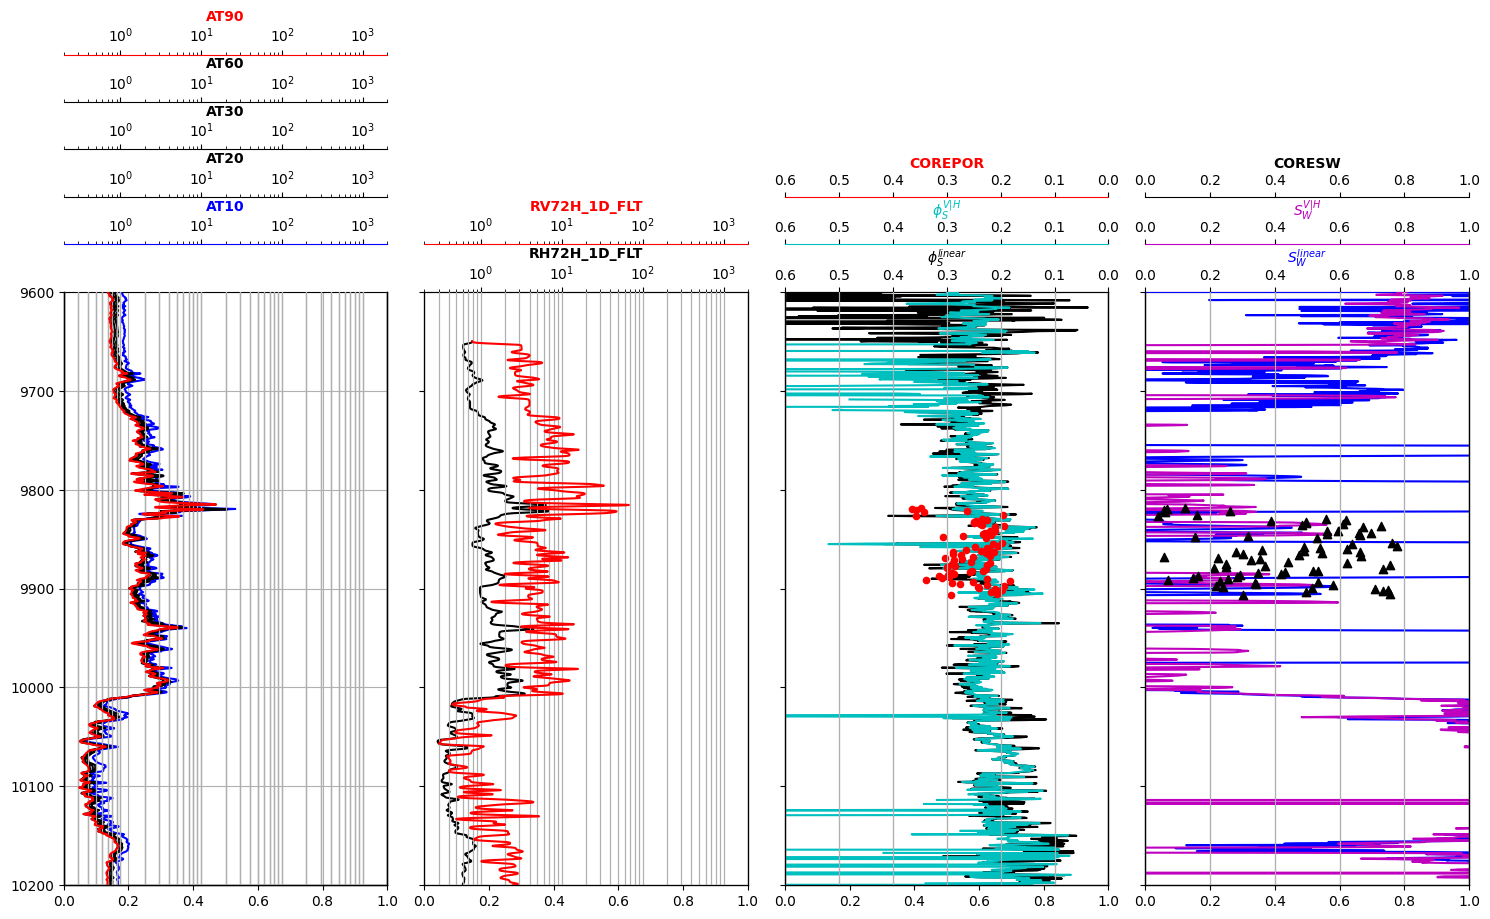

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(15,10), sharey=True)
ax1, ax2, ax3, ax4 = axs

resistivities = ['AT10','AT20','AT30','AT60','AT90']
res_colors    = ['b','k','k','k','r']
for idx, (res,c) in enumerate(zip(resistivities, res_colors)):
    plot_curve(ax1.twiny(), res, 0.2, 2000, color=c, semilog=True, pad=pad+(0.08*idx))
ax1.grid(True, which='both')
ax1.set_ylim(9600,10200)
ax1.invert_yaxis()

ax21, ax22 = ax2.twiny(), ax2.twiny()
ax21.semilogx(data['RH72H_1D_FLT'], depth[depth_condition], c='k')
ax21.grid(True, which='both')
ax21.set_xlim(0.2,2000)
ax21.xaxis.set_ticks_position('top')
ax21.xaxis.set_label_position('top')
ax21.spines['top'].set_position(('axes',1))
ax21.spines['top'].set_edgecolor('k')
ax21.set_xlabel('RH72H_1D_FLT', color='k', weight='bold')

ax22.semilogx(data['RV72H_1D_FLT'], depth[depth_condition], c='r')
ax22.grid(True, which='both')
ax22.set_xlim(0.2,2000)
ax22.xaxis.set_ticks_position('top')
ax22.xaxis.set_label_position('top')
ax22.spines['top'].set_position(('axes',1.08))
ax22.spines['top'].set_edgecolor('r')
ax22.set_xlabel('RV72H_1D_FLT', color='r', weight='bold')

ax31, ax32, ax33 = ax3.twiny(), ax3.twiny(), ax3.twiny()
ax31.plot(phi_s, depth[depth_condition], label='$\phi_S$', c='k')
ax31.grid(True, which='both')
ax31.set_xlim(0.6,0)
ax31.xaxis.set_ticks_position('top')
ax31.xaxis.set_label_position('top')
ax31.spines['top'].set_position(('axes',1))
ax31.spines['top'].set_edgecolor('k')
ax31.set_xlabel('$\phi_S^{linear}$', color='k', weight='bold')

ax32.plot(phi_s2, depth[depth_condition], label='$\phi_S$', c='c')
ax32.grid(True, which='both')
ax32.set_xlim(0.6,0)
ax32.xaxis.set_ticks_position('top')
ax32.xaxis.set_label_position('top')
ax32.spines['top'].set_position(('axes',1.08))
ax32.spines['top'].set_edgecolor('c')
ax32.set_xlabel('$\phi_S^{V | H}$', color='c', weight='bold')

ax33.scatter(data['COREPOR'].values, depth[depth_condition], s=20, c='r', label='COREPOR')
ax33.grid(True, which='both')
ax33.set_xlim(0.6,0)
ax33.xaxis.set_ticks_position('top')
ax33.xaxis.set_label_position('top')
ax33.spines['top'].set_position(('axes',1.16))
ax33.spines['top'].set_edgecolor('r')
ax33.set_xlabel('COREPOR', color='r', weight='bold')

ax41, ax42, ax43 = ax4.twiny(), ax4.twiny(), ax4.twiny()
ax41.plot(sw.interpolate('polynomial', order=5), depth[depth_condition], c='b')
ax41.grid(True, which='both')
ax41.set_xlim(0,1)
ax41.xaxis.set_ticks_position('top')
ax41.xaxis.set_label_position('top')
ax41.spines['top'].set_position(('axes',1))
ax41.spines['top'].set_edgecolor('b')
ax41.set_xlabel('$S_W^{linear}$', color='b', weight='bold')

ax42.plot(sw2.interpolate('polynomial', order=5), depth[depth_condition], c='m')
ax42.grid(True, which='both')
ax42.set_xlim(0,1)
ax42.xaxis.set_ticks_position('top')
ax42.xaxis.set_label_position('top')
ax42.spines['top'].set_position(('axes',1.08))
ax42.spines['top'].set_edgecolor('m')
ax42.set_xlabel('$S_W^{V|H}$', color='m', weight='bold')

ax43.scatter(data['CORESW'], depth[depth_condition], c='k', marker='^', label='CORESW')
ax43.grid(True, which='both')
ax43.set_xlim(0,1)
ax43.xaxis.set_ticks_position('top')
ax43.xaxis.set_label_position('top')
ax43.spines['top'].set_position(('axes',1.16))
ax43.spines['top'].set_edgecolor('k')
ax43.set_xlabel('CORESW', color='k', weight='bold')

plt.tight_layout()
plt.show()

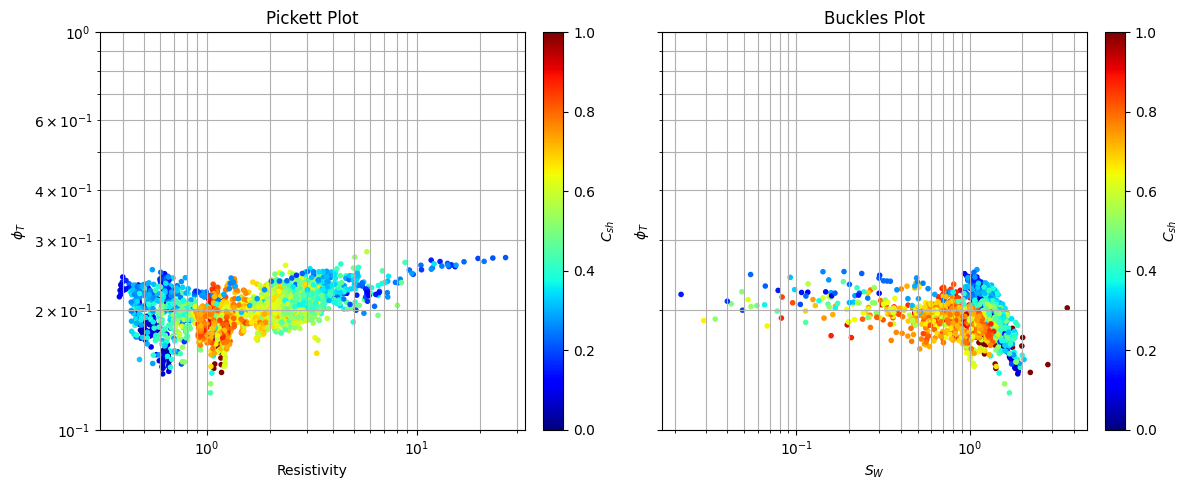

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), sharey=True)
ax1, ax2 = axs

im1 = ax1.scatter(data['AT10'], phi_t, marker='.', c=csh.values, cmap='jet', vmin=0, vmax=1)
ax1.set(ylim=(0.1,1), xscale='log', yscale='log', xlabel='Resistivity', ylabel='$\phi_T$')
ax1.grid(True, which='both'); ax1.set_title('Pickett Plot')
plt.colorbar(im1, pad=0.04, fraction=0.046, label='$C_{sh}$')

im2 = ax2.scatter(sw.values, phi_t, marker='.', c=csh.values, cmap='jet', vmin=0, vmax=1)
ax2.set(ylim=(0.1,1), xscale='log', yscale='log', xlabel='$S_W$', ylabel='$\phi_T$')
ax2.grid(True, which='both'); ax2.set_title('Buckles Plot')
plt.colorbar(im2, pad=0.04, fraction=0.046, label='$C_{sh}$')

plt.tight_layout()
plt.show()

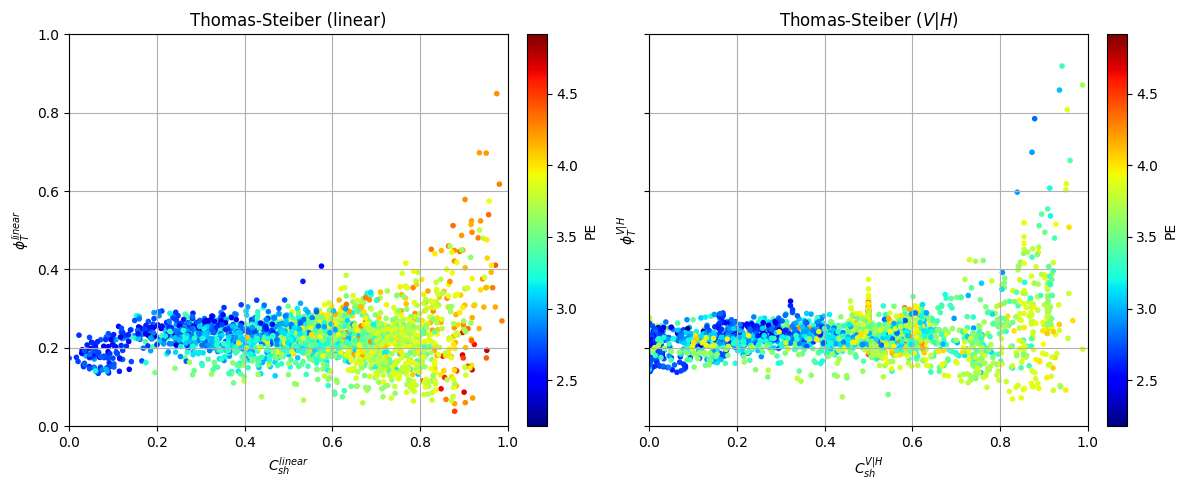

In [141]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), sharey=True)
ax1, ax2 = axs

im1 = ax1.scatter(csh.values, phi_s, marker='.', c=data['PE'], cmap='jet')
ax1.set(xlim=(0, 1), ylim=(0, 1), xlabel=('$C_{sh}^{linear}$'), ylabel=('$\phi_T^{linear}$'), title=('Thomas-Steiber (linear)'))
ax1.grid(True, which='both')
plt.colorbar(im1, pad=0.04, fraction=0.046, label='PE')

im2 = ax2.scatter(csh2.values, phi_s2, marker='.', c=data['PE'], cmap='jet')
ax2.set(xlim=(0, 1), ylim=(0, 1), xlabel=('$C_{sh}^{V|H}$'), ylabel=('$\phi_T^{V|H}$'), title=('Thomas-Steiber ($V|H$)'))
ax2.grid(True, which='both')
plt.colorbar(im2, pad=0.04, fraction=0.046, label='PE')

plt.tight_layout()
plt.show()

In [24]:
rhof  = (data['RHO8'].values - 2.65*(1-csh['Csh'])*(1-phi_s) - 2.3509*csh['Csh']) / (phi_s*(1-csh['Csh']))
rhof2 = (data['RHO8'].values - 2.65*(1-csh2.values)*(1-phi_s2) - 2.3509*csh2.values) / (phi_s2*(1-csh2.values)) 

In [25]:
def plot_log(ax, data, lb, ub, label, color, pad=1, scatter=False, semilog=False, marker='.', size=20, linestyle='-'):
    if scatter:
        ax.scatter(data, depth[depth_condition], s=size, c=color, marker=marker)
        if semilog:
            ax.scatter(data, depth[depth_condition], c=color, marker=marker, s=size)
            ax.set_xscale('log')
    else:
        if semilog:
            ax.plot(data, depth[depth_condition], c=color, linestyle=linestyle)
            ax.set_xscale('log')
        else:
            ax.plot(data, depth[depth_condition], c=color, linestyle=linestyle)

    ax.grid(True, which='both')
    ax.set_xlim(lb,ub)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.spines['top'].set_position(('axes',pad))
    ax.spines['top'].set_edgecolor(color)
    ax.set_xlabel(label, color=color, weight='bold')

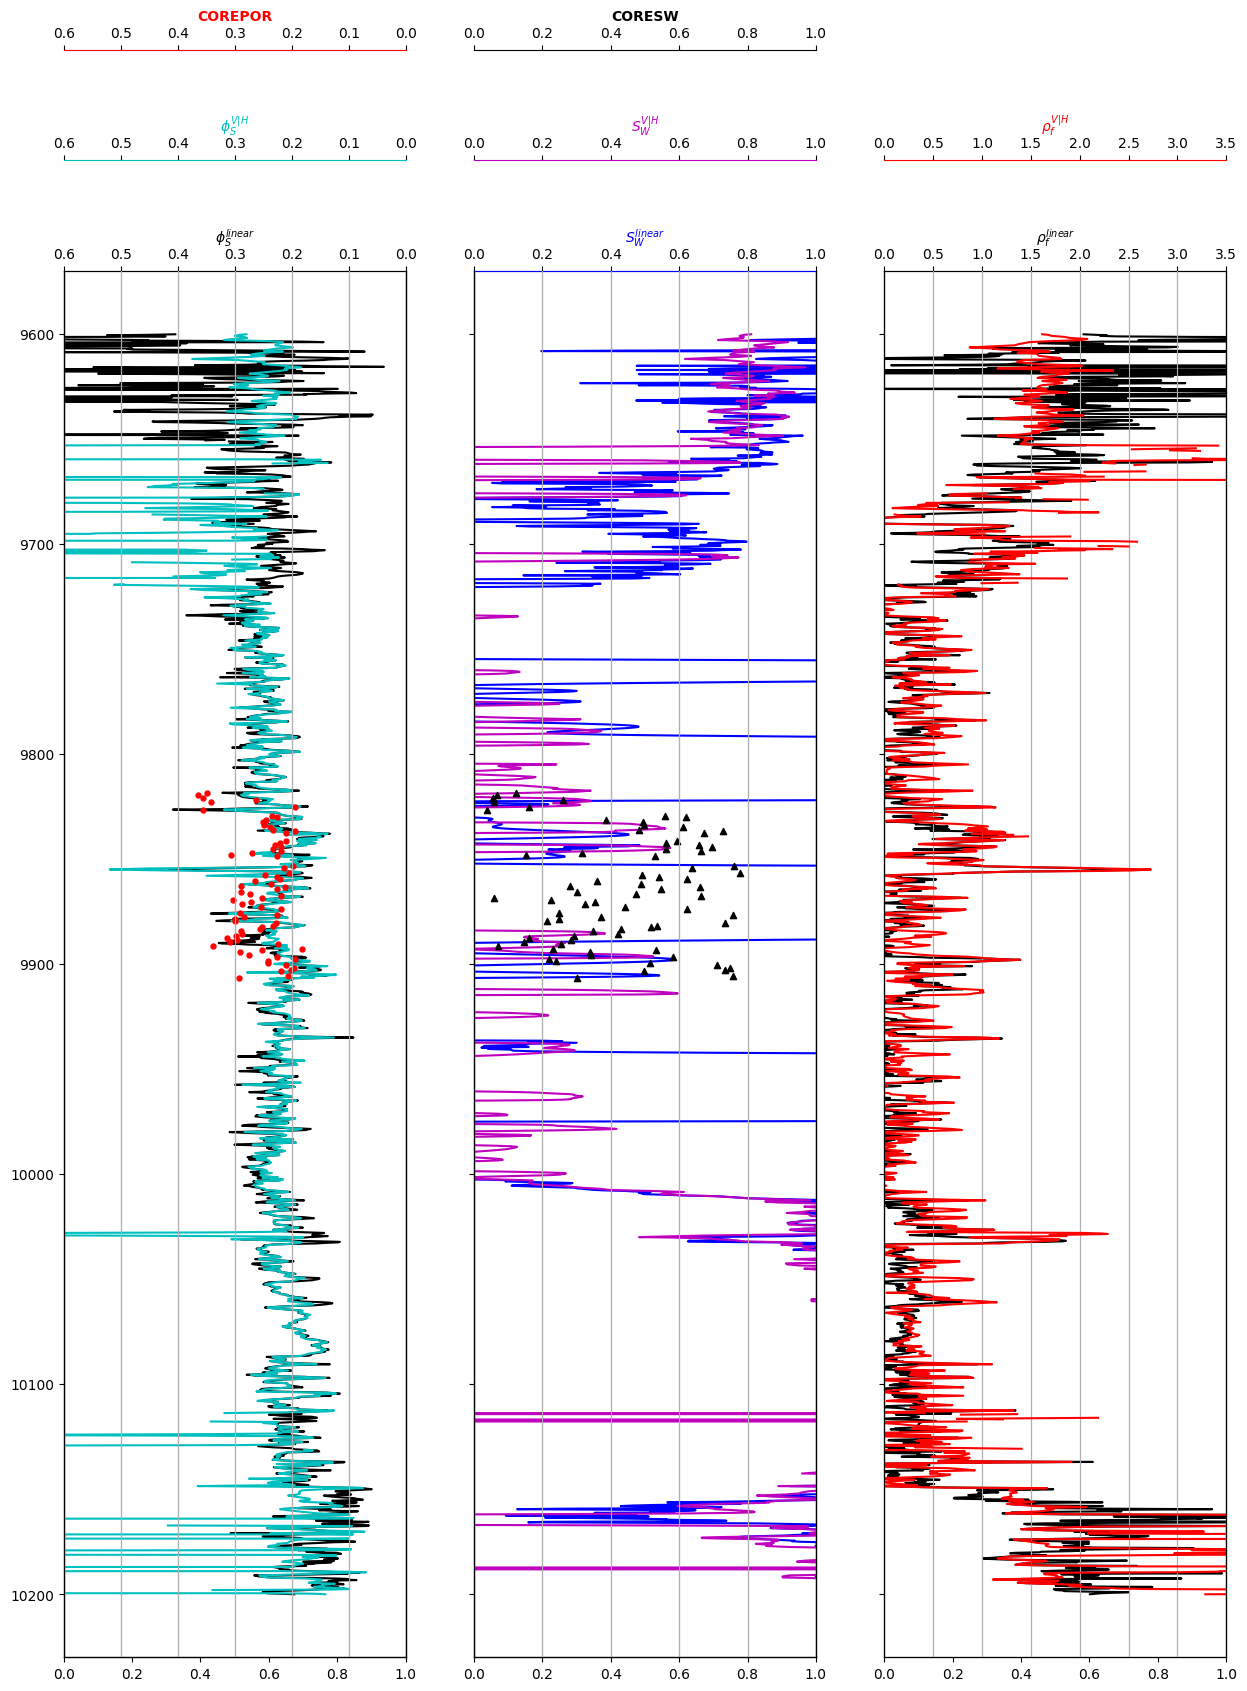

In [143]:
fig, axs = plt.subplots(1, 3, figsize=(15,18), sharey=True)
ax1, ax2, ax3 = axs

ax11, ax12, ax13 = ax1.twiny(), ax1.twiny(), ax1.twiny()
plot_log(ax11, phi_s, 0.6, 0, '$\phi_S^{linear}$', 'k', 1)
plot_log(ax12, phi_s2, 0.6, 0, '$\phi_S^{V|H}$', 'c', 1.08)
plot_log(ax13, data['COREPOR'].values, 0.6, 0, 'COREPOR', 'r', 1.16, scatter=True, size=50)

ax21, ax22, ax23 = ax2.twiny(), ax2.twiny(), ax2.twiny()
plot_log(ax21, sw.interpolate('polynomial',order=5), 0, 1, '$S_W^{linear}$', 'b', 1)
plot_log(ax22, sw2.interpolate('polynomial',order=5), 0, 1, '$S_W^{V|H}$', 'm', 1.08)
plot_log(ax23, data['CORESW'].values, 0, 1, 'CORESW', 'k', 1.16, scatter=True, marker='^')

ax31, ax32 = ax3.twiny(), ax3.twiny()
plot_log(ax31, rhof, 0, 3.5, r"$\rho_f^{linear}$", 'k', 1)
plot_log(ax32, rhof2, 0, 3.5, r"$\rho_f^{V|H}$", 'r', 1.08)

fig.gca().invert_yaxis()

plt.show()

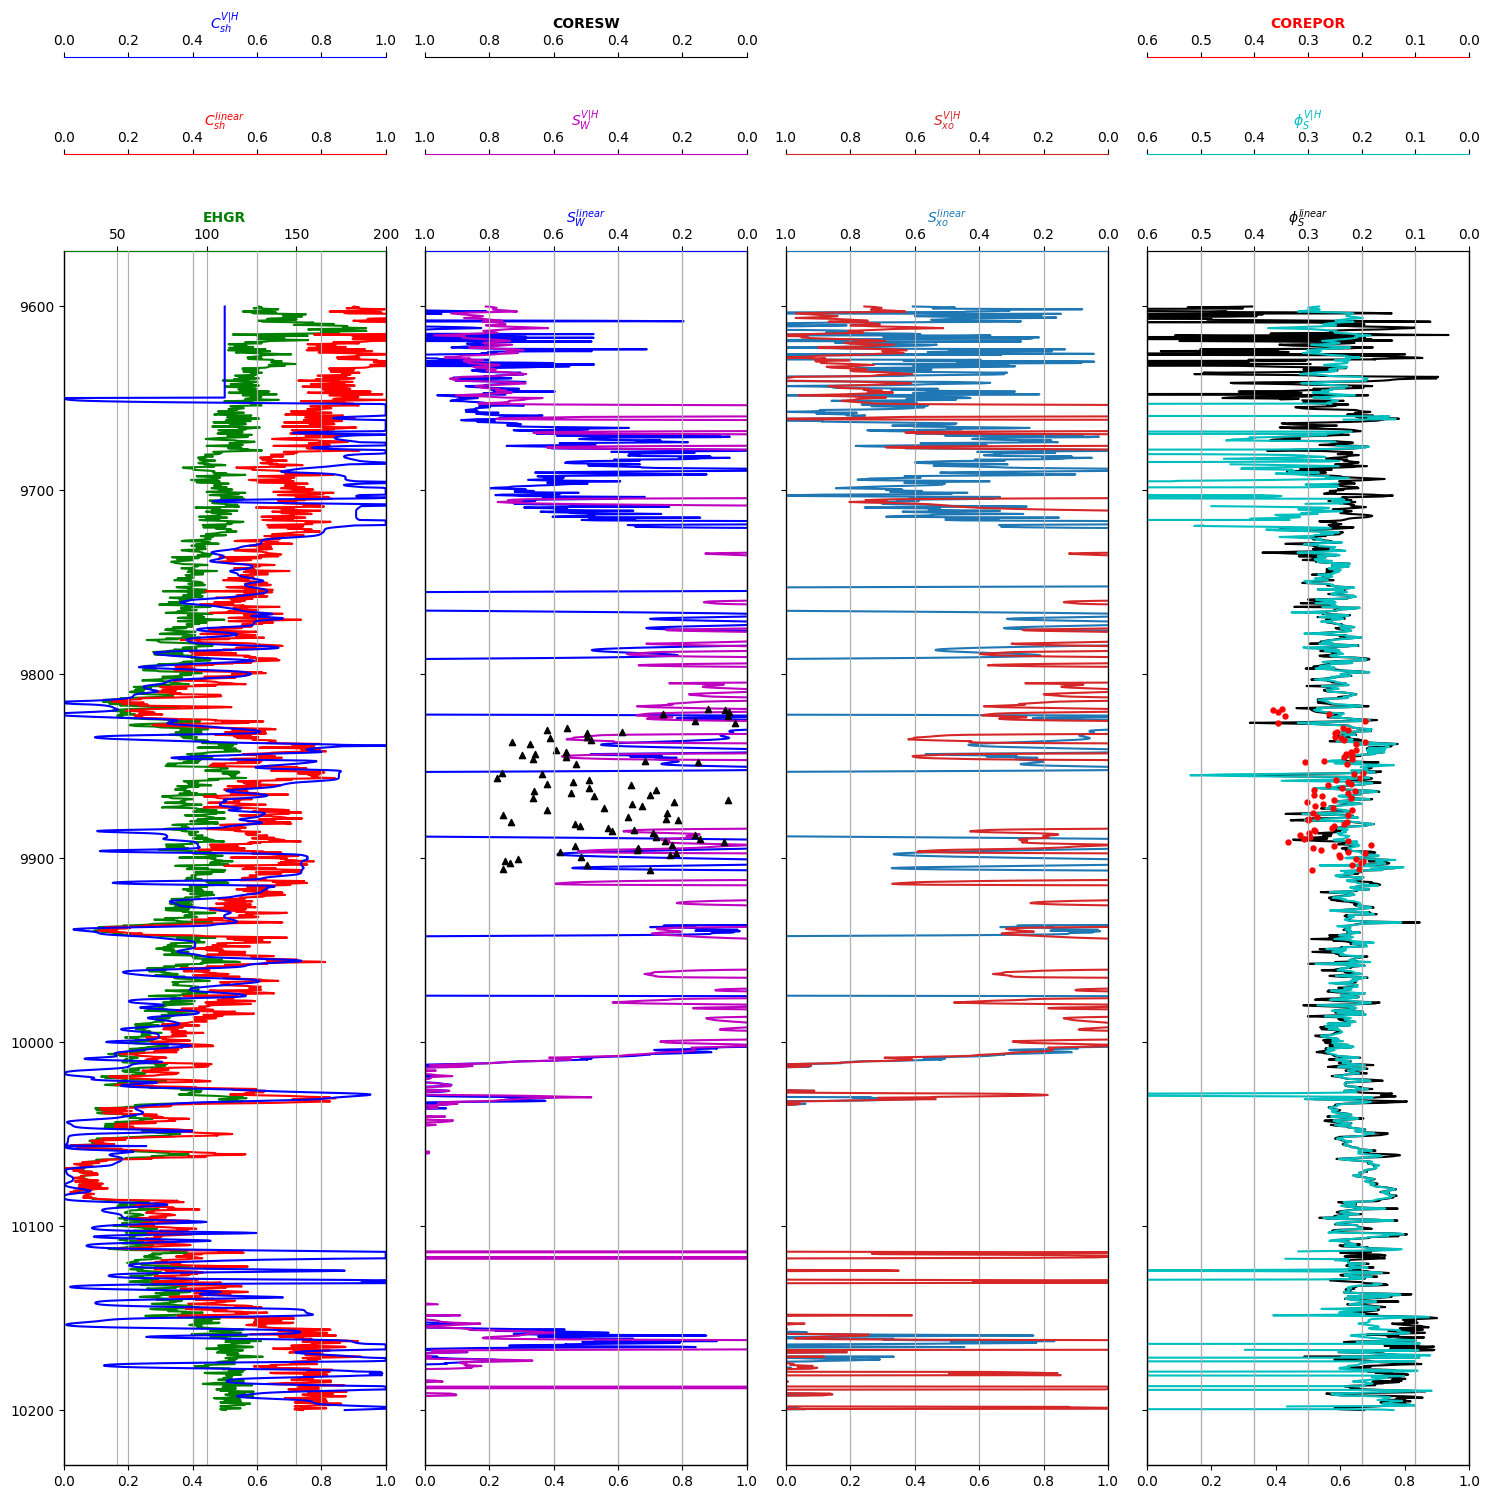

In [144]:
rxo = 0.027
rw  = 0.02

sxo  = (rxo / (rs*phi_s**2.1))**(1/1.9)
sxo2 = (rxo / (rs2*phi_s2**2.1))**(1/1.9)

# numerator = ((rsh - data['AT10']*rsh)*rw*1 )
# denominator = (phi_t**2.1 * (rsh*data['AT10']*(1-csh['Csh'])))
# sxo = (numerator/denominator)**(1/1.9)

# numerator = ((rsh - data['AT10']*rsh)*rw*1 )
# denominator = (phi_t2.values**2.1 * (rsh*data['AT10']*(1-csh2.values)))
# sxo2 = (numerator/denominator)**(1/1.9)

fig, axs = plt.subplots(1,4, figsize=(15,15), sharey=True)
ax1, ax2, ax3, ax4 = axs

plot_log(ax1.twiny(), data['EHGR'], 20, 200, 'EHGR', color='green', pad=1)
plot_log(ax1.twiny(), csh, 0, 1, '$C_{sh}^{linear}$', color='r', pad=1.08)
plot_log(ax1.twiny(), csh2, 0, 1, '$C_{sh}^{V|H}$', color='b', pad=1.16)

plot_log(ax2.twiny(), sw.interpolate('polynomial', order=5), 1, 0, '$S_W^{linear}$', color='b', pad=1)
plot_log(ax2.twiny(), sw2.interpolate('polynomial', order=5), 1, 0, '$S_W^{V|H}$', color='m', pad=1.08)
plot_log(ax2.twiny(), data['CORESW'], 1, 0, 'CORESW', color='k', pad=1.16, scatter=True, marker='^')

plot_log(ax3.twiny(), sxo.interpolate('polynomial', order=5), 1, 0, '$S_{xo}^{linear}$', color='tab:blue', pad=1)
plot_log(ax3.twiny(), sxo2.interpolate('polynomial', order=5), 1, 0, '$S_{xo}^{V|H}$', color='tab:red', pad=1.08)

plot_log(ax4.twiny(), phi_s, 0.6, 0, '$\phi_S^{linear}$', color='k')
plot_log(ax4.twiny(), phi_s2, 0.6, 0, '$\phi_S^{V|H}$', color='c', pad=1.08)
plot_log(ax4.twiny(), data['COREPOR'], 0.6, 0, 'COREPOR', color='r', size=50, scatter=True, pad=1.16)

fig.gca().invert_yaxis()
fig.tight_layout()
plt.show()

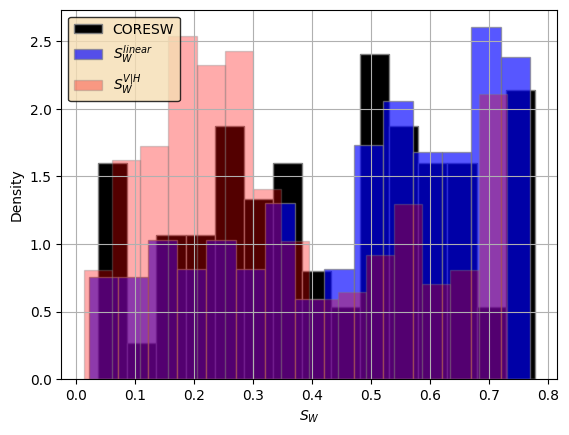

In [28]:
plt.hist(data['CORESW'], bins=15, density=True, edgecolor='gray', alpha=1, label='CORESW', color='k')
plt.hist(sw[sw<.77], bins=15, alpha=0.66, density=True, edgecolor='gray', label='$S_W^{linear}$', color='b')
plt.hist(sw2[sw2<.73], bins=15, alpha=0.33, density=True, edgecolor='gray', label='$S_W^{V|H}$', color='r')

plt.xlabel('$S_W$'); plt.ylabel('Density'); plt.grid('on'); plt.legend(facecolor='wheat', edgecolor='k')
plt.show()

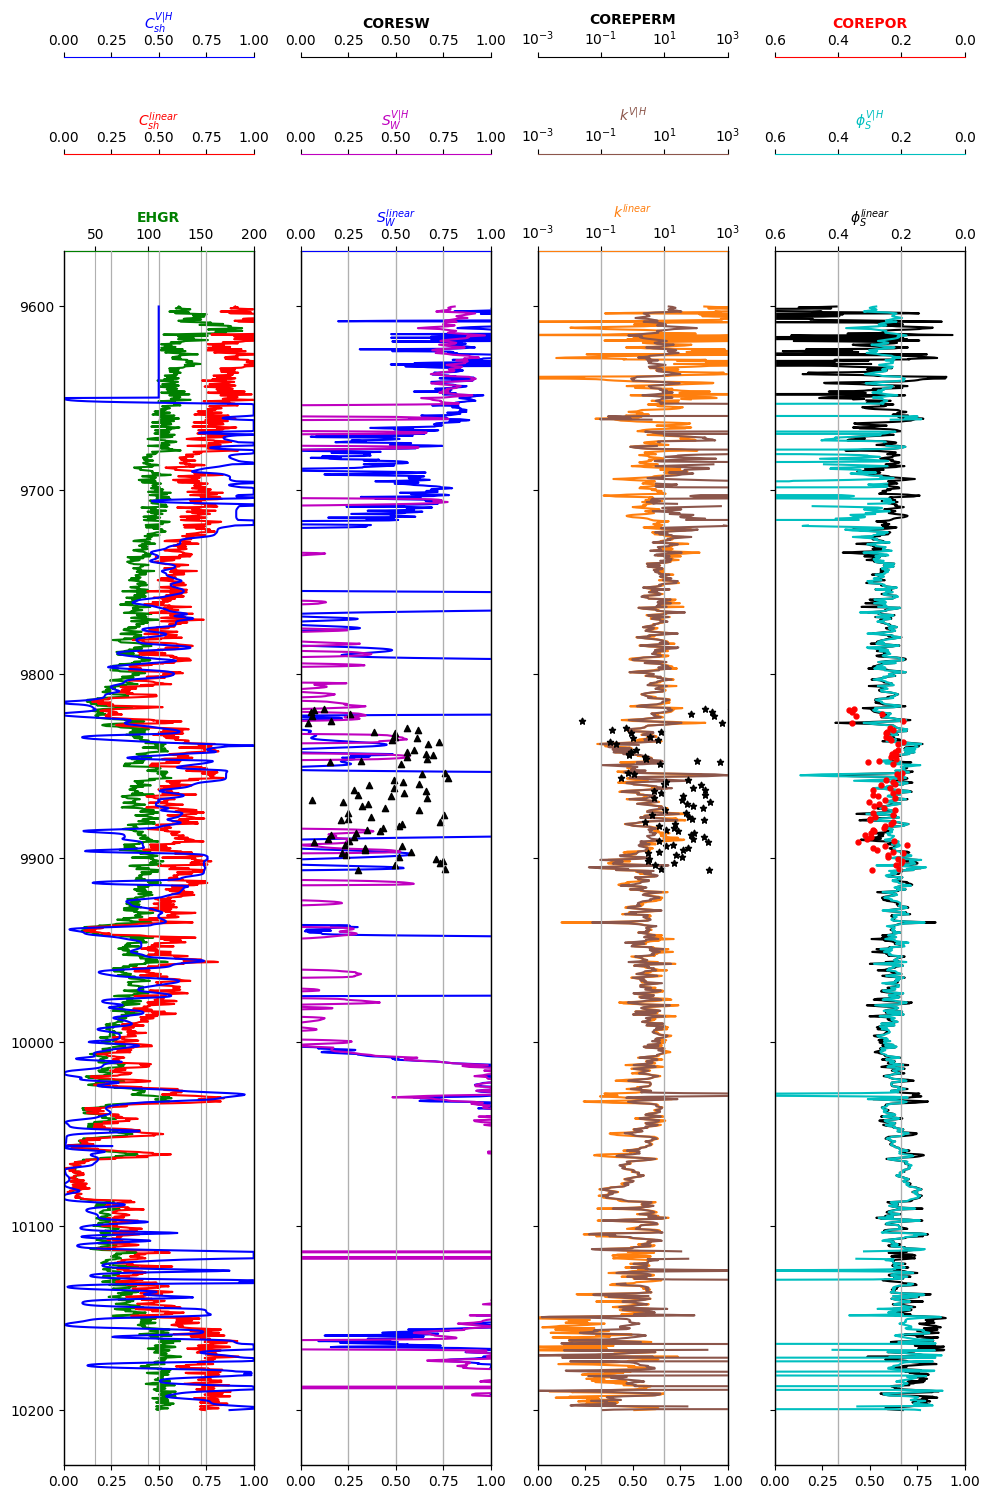

In [29]:
k  = 6500 * (phi_s**7 / 0.25**2)
k2 = 6500 * (phi_s2**7 / 0.25**2) 

fig, axs = plt.subplots(1,4, figsize=(10,15), sharey=True)
ax1, ax2, ax3, ax4 = axs

plot_log(ax1.twiny(), data['EHGR'], 20, 200, 'EHGR', color='green', pad=1)
plot_log(ax1.twiny(), csh, 0, 1, '$C_{sh}^{linear}$', color='r', pad=1.08)
plot_log(ax1.twiny(), csh2, 0, 1, '$C_{sh}^{V|H}$', color='b', pad=1.16)

plot_log(ax2.twiny(), sw.interpolate('polynomial', order=5), 0, 1, '$S_W^{linear}$', color='b', pad=1)
plot_log(ax2.twiny(), sw2.interpolate('polynomial', order=5), 0, 1, '$S_W^{V|H}$', color='m', pad=1.08)
plot_log(ax2.twiny(), data['CORESW'], 0, 1, 'CORESW', color='k', pad=1.16, scatter=True, marker='^')

plot_log(ax3.twiny(), k, 1e-3, 1e3, '$k^{linear}$', color='tab:orange', pad=1, semilog=True)
plot_log(ax3.twiny(), k2, 1e-3, 1e3, '$k^{V|H}$', color='tab:brown', pad=1.08, semilog=True)
plot_log(ax3.twiny(), data['COREPERM'], 1e-3, 1e3, 'COREPERM', color='k', marker='*', scatter=True, semilog=True, pad=1.16)

plot_log(ax4.twiny(), phi_s, 0.6, 0, '$\phi_S^{linear}$', color='k')
plot_log(ax4.twiny(), phi_s2, 0.6, 0, '$\phi_S^{V|H}$', color='c', pad=1.08)
plot_log(ax4.twiny(), data['COREPOR'], 0.6, 0, 'COREPOR', color='r', size=50, scatter=True, pad=1.16)

fig.gca().invert_yaxis()
fig.tight_layout()
plt.show()

In [30]:
k2.index = k.index

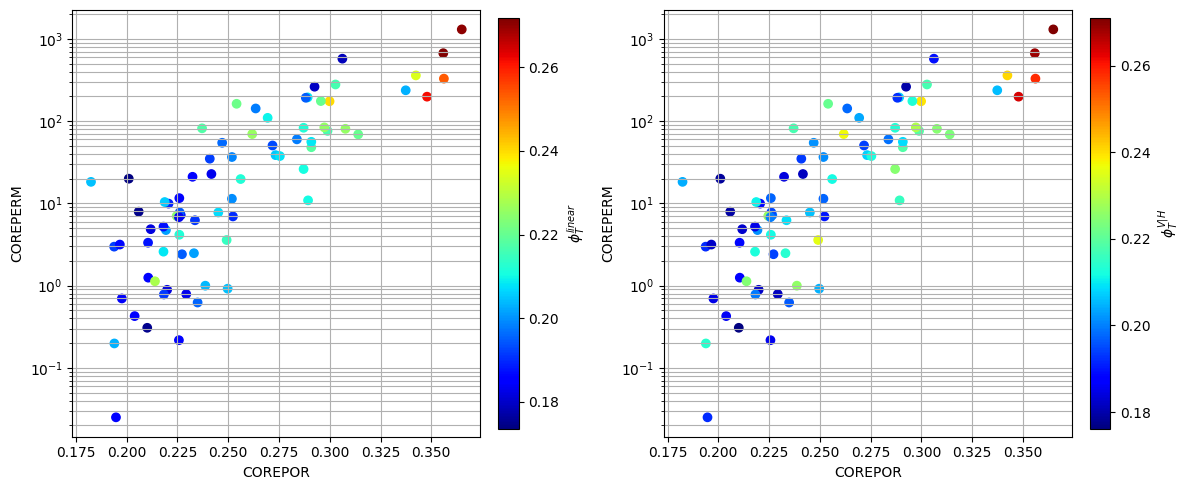

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(data['COREPOR'], data['COREPERM'], c=phi_t, cmap='jet')
plt.yscale('log')
plt.grid(True, which='both')
plt.colorbar(pad=0.04, fraction=0.046, label='$\phi_T^{linear}$')
plt.xlabel('COREPOR'); plt.ylabel('COREPERM' )

plt.subplot(122)
plt.scatter(data['COREPOR'], data['COREPERM'], c=phi_t2, cmap='jet')
plt.yscale('log')
plt.grid(True, which='both')
plt.colorbar(pad=0.04, fraction=0.046, label='$\phi_T^{V|H}$')
plt.xlabel('COREPOR'); plt.ylabel('COREPERM' )

plt.tight_layout()
plt.show()

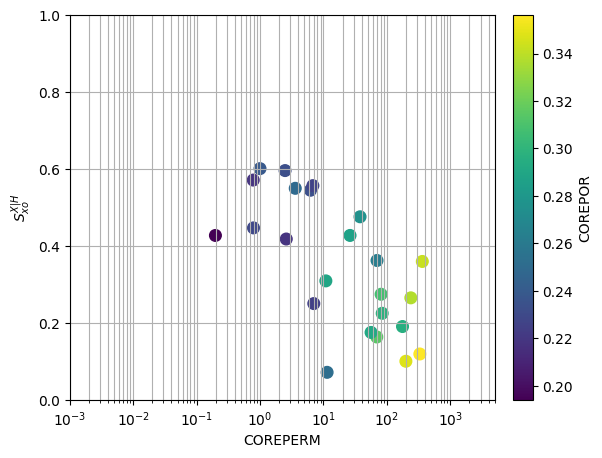

In [32]:
plt.figure(figsize=(6,5))

plt.scatter(data['COREPERM'], sxo2, c=data['COREPOR'], s=70, cmap='viridis')
plt.xscale('log'); plt.grid(True, which='both')
plt.xlabel('COREPERM'); plt.ylabel('$S_{xo}^{X|H}$' )
plt.colorbar(pad=0.04, fraction=0.046, label='COREPOR')
plt.gca().set_aspect('auto')
plt.ylim(0,1)
plt.xlim(1e-3,5e3)
plt.show()

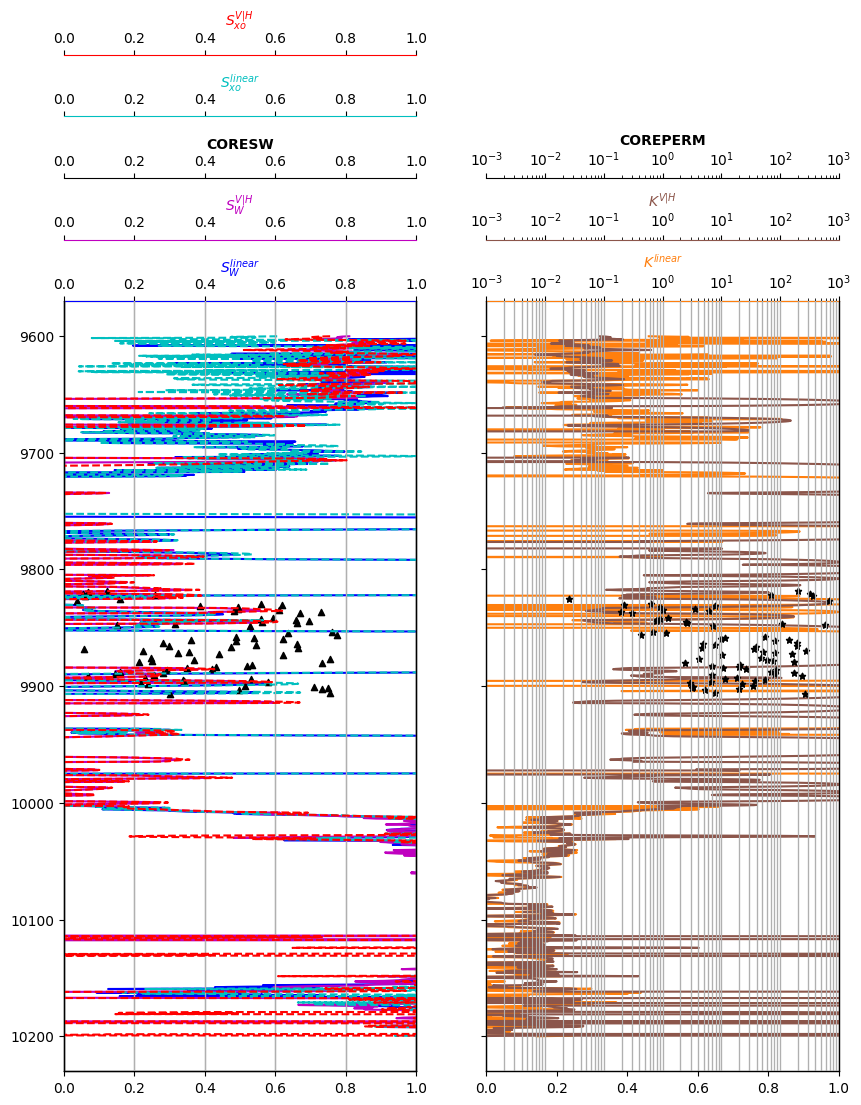

In [33]:
ktimur  = 6.18 * phi_s**3.87  / sxo**2.28
ktimur2 = 6.18 * phi_s2**3.87 / sxo2**2.28  

fig, axs = plt.subplots(1, 2, figsize=(10,10), sharey=True)
ax1, ax2 = axs

plot_log(ax1.twiny(), sw.interpolate('polynomial', order=5), 0, 1, '$S_W^{linear}$', 'b', 1)
plot_log(ax1.twiny(), sw2.interpolate('polynomial', order=5), 0, 1, '$S_W^{V|H}$', 'm', 1.08)
plot_log(ax1.twiny(), data['CORESW'], 0, 1, 'CORESW', 'k', scatter=True, marker='^', size=20, pad=1.16)
plot_log(ax1.twiny(), sxo.interpolate('polynomial', order=5), 0, 1, '$S_{xo}^{linear}$', 'c', 1.24, linestyle='--')
plot_log(ax1.twiny(), sxo2.interpolate('polynomial', order=5), 0, 1, '$S_{xo}^{V|H}$', 'r', 1.32, linestyle='--')

plot_log(ax2.twiny(), ktimur.interpolate('polynomial',order=11), 1e-3, 1e3, '$K^{linear}$', 'tab:orange', 1, semilog=True)
plot_log(ax2.twiny(), ktimur2.interpolate('polynomial',order=11), 1e-3, 1e3, '$K^{V|H}$', 'tab:brown', 1.08, semilog=True)
plot_log(ax2.twiny(), data['COREPERM'], 1e-3, 1e3, 'COREPERM', 'k', pad=1.16, scatter=True, semilog=True, marker='*', size=20)

fig.gca().invert_yaxis()
plt.show()

***
# END